In [1]:
import pandas as pd
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
pd.__version__

'1.4.1'

# IO

In [4]:
# ph = r".\testfile\pdtestdata.csv"
ph = r".\testfile\mc03test.csv"
dt = pd.read_csv(ph,index_col=0,parse_dates=True)
dt.sort_index(ascending=True,inplace=True)
dt['day'] = dt.index.map(lambda x: pd.to_datetime(x).strftime("%Y-%m-%d"))
dt.head()
dt.shape

,StartDateTime,ProductionOrder,BinCode,SubstrateSessionId,MeasureDataId,ContactId,EnvironmentSetPointId,SiteId,LimitsId,EnvironmentSetPointPos,ContactElapsedMs,IsSubstrateGradeProduction,AllWithin,X_OnSubstrate,Y_OnSubstrate,DutFirmwareMajorVersion,DutFirmwareMinorVersion,ResetOnPmCalibrationSuccessful,DeleteCalibrationSuccessful,DeviceId,DeviceIdInternal,T15,ProductionDate,ProductionDateIsPass,ProductionDateIsWritten,ReadLmCalibBin,ReadPmCalibBin,ReadAllBinsGoodQualityIndicator,AutoCleaningInterval_Reset,SetTargetFanSpeed,SetUpdateInterval,SetPeakThreshold,SetPeakClippingLimit,SetLaserSetPoint,SetNoiseSuppression,SetParametersVersionMajor,SetParametersVersionMinor,SetPeakBitShift,VoltageIn,VoltageSclTx,VoltageSdaRx,VoltageIfSelect,VoltageBoot,VoltageShieldTest,PhotoTicksLaserOff,PhotoTicksLaserOn,PhotoTicksDiff,FanSpeedMedian_Arz,FanVoltageMedian_Arz,FanSpeedStd_Arz,FanVoltageStd_Arz,PmNormRate_Arz,CountRate_Arz,PmNormRateAligned_Arz,FanSpeedMedian_Kcl,FanVoltageMedian_Kcl,FanSpeedStd_Kcl,FanVoltageStd_Kcl,PmNormRate_Kcl,CountRate_Kcl,PmNormRateAligned_Kcl,CalculationSuccessful,WarningCode,ErrorCode,KclHyp_0,KclHyp_1,KclHyp_2,KclHyp_3,KclHyp_4,KclHyp_5,ArzHyp_0,ArzHyp_1,ArzHyp_2,ArzHyp_3,ArzHyp_4,ArzHyp_5,Omega,GainKclMc_0p5,GainKclMc_1p0,GainKclMc_2p5,GainKclMc_4p0,GainKclMc_10p0,GainKclNc_0p5,GainKclNc_1p0,GainKclNc_2p5,GainKclNc_4p0,GainKclNc_10p0,GainArzMc_0p5,GainArzMc_1p0,GainArzMc_2p5,GainArzMc_4p0,GainArzMc_10p0,GainArzNc_0p5,GainArzNc_1p0,GainArzNc_2p5,GainArzNc_4p0,GainArzNc_10p0,AlphaMc_0p5,AlphaNc_0p5,AlphaMc_1p0,AlphaNc_1p0,AlphaMc_2p5,AlphaNc_2p5,AlphaMc_4p0,AlphaNc_4p0,AlphaMc_10p0,AlphaNc_10p0,BetaMc_0p5,BetaNc_0p5,BetaMc_1p0,BetaNc_1p0,BetaMc_2p5,BetaNc_2p5,BetaMc_4p0,BetaNc_4p0,BetaMc_10p0,BetaNc_10p0,WriteCalibrationSuccessful,Pm2p5NumbConcDutAccuracy_Remeasurement,Pm2p5MassConcDutAccuracy_Remeasurement,Pm2p5NumbConcDutNoise_Remeasurement,Pm2p5MassConcDutNoise_Remeasurement,Pm2p5NumbConcDutMean_Remeasurement,Pm2p5MassConcDutMean_Remeasurement,AutoCleaningInterval_Final,SaturatedBins_Kcl,SaturatedBins_Arz,OmegaInterceptMc_0p5,OmegaInterceptNc_0p5,OmegaInterceptMc_1p0,OmegaInterceptNc_1p0,OmegaInterceptMc_2p5,OmegaInterceptNc_2p5,OmegaInterceptMc_4p0,OmegaInterceptNc_4p0,OmegaInterceptMc_10p0,OmegaInterceptNc_10p0,OmegaInterceptNcDiff_Bin01,OmegaInterceptNcDiff_Bin02,OmegaInterceptNcDiff_Bin03,OmegaInterceptNcDiff_Bin04,OmegaInterceptNcDiff_Bin05,MD5,DutFirmwareMajorVersion_LTL,DutFirmwareMajorVersion_UTL,DutFirmwareMinorVersion_LTL,DutFirmwareMinorVersion_UTL,ResetOnPmCalibrationSuccessful_LTL,ResetOnPmCalibrationSuccessful_UTL,DeleteCalibrationSuccessful_LTL,DeleteCalibrationSuccessful_UTL,DeviceIdInternal_LTL,DeviceIdInternal_UTL,T15_LTL,T15_UTL,ProductionDateIsPass_LTL,ProductionDateIsPass_UTL,ProductionDateIsWritten_LTL,ProductionDateIsWritten_UTL,ReadLmCalibBin_LTL,ReadLmCalibBin_UTL,ReadPmCalibBin_LTL,ReadPmCalibBin_UTL,ReadAllBinsGoodQualityIndicator_LTL,ReadAllBinsGoodQualityIndicator_UTL,AutoCleaningInterval_Reset_LTL,AutoCleaningInterval_Reset_UTL,SetTargetFanSpeed_LTL,SetTargetFanSpeed_UTL,SetUpdateInterval_LTL,SetUpdateInterval_UTL,SetPeakThreshold_LTL,SetPeakThreshold_UTL,SetPeakClippingLimit_LTL,SetPeakClippingLimit_UTL,SetLaserSetPoint_LTL,SetLaserSetPoint_UTL,SetNoiseSuppression_LTL,SetNoiseSuppression_UTL,SetParametersVersionMajor_LTL,SetParametersVersionMajor_UTL,SetParametersVersionMinor_LTL,SetParametersVersionMinor_UTL,SetPeakBitShift_LTL,SetPeakBitShift_UTL,VoltageIn_LTL,VoltageIn_UTL,VoltageSclTx_LTL,VoltageSclTx_UTL,VoltageSdaRx_LTL,VoltageSdaRx_UTL,VoltageIfSelect_LTL,VoltageIfSelect_UTL,VoltageBoot_LTL,VoltageBoot_UTL,VoltageShieldTest_LTL,VoltageShieldTest_UTL,PhotoTicksLaserOff_LTL,PhotoTicksLaserOff_UTL,PhotoTicksLaserOn_LTL,PhotoTicksLaserOn_UTL,PhotoTicksDiff_LTL,PhotoTicksDiff_UTL,FanSpeedMedian_Arz_LTL,FanSpeedMedian_Arz_UTL,FanVoltageMedian_Arz_LTL,FanVoltageMedian_Arz_UTL,FanSpeedStd_Arz_LTL,FanSpeedStd_Arz_UTL,FanVoltageStd_Arz_LTL,FanVoltageStd_Arz_UTL,PmNormRate_Arz_LTL,

(500, 559)

In [4]:
cols = ['KclHyp_0',
 'KclHyp_5',
 'ArzHyp_0',
 'ArzHyp_5',
 'Omega',
 'GainKclMc_2p5',
  'GainKclNc_2p5',
 'GainArzMc_2p5',
  'FacilityNr']

In [5]:
df = dt[cols].head(10)

# DataFrame

## Attributes

### at: 通过标签读取行列坐标的值

In [8]:
dt.at["2021-11-10 00:28:03",'ProductionOrder']

1992659

### attrs: 字典:该数组的全局属性

In [9]:
dt.attrs

{}

### axes: 轴标签的列表

In [21]:
for ix in df.axes:   #包含行和列
    print(ix)

Index(['2021-11-10 00:09:48', '2021-11-10 00:11:15', '2021-11-10 00:23:24',
       '2021-11-10 00:24:39', '2021-11-10 00:28:03', '2021-11-10 00:42:34',
       '2021-11-10 00:44:18', '2021-11-10 00:46:41', '2021-11-10 00:57:17',
       '2021-11-10 00:57:32'],
      dtype='object', name='StartDateTime')
Index(['KclHyp_0', 'KclHyp_5', 'ArzHyp_0', 'ArzHyp_5', 'Omega',
       'GainKclMc_2p5', 'GainKclNc_2p5', 'GainArzMc_2p5', 'FacilityNr'],
      dtype='object')


### columns: 列标签

In [ ]:
dt.columns

### dtypes: 所有列的数据类型

In [23]:
df.dtypes

KclHyp_0         float64
KclHyp_5         float64
ArzHyp_0         float64
ArzHyp_5         float64
Omega            float64
GainKclMc_2p5    float64
GainKclNc_2p5    float64
GainArzMc_2p5    float64
FacilityNr        object
dtype: object

### empty: Series/DataFrame是否为空

In [ ]:
dt.empty

### flags: 字面意思:是否允许重复的列

In [24]:
dt.flags            #查看

<Flags(allows_duplicate_labels=True)>

In [49]:
# 可以通过两种方式设置:
df.flags.allows_duplicate_labels = True   #可以设置的,  
# dt.flags["allows_duplicate_labels"] = False

In [50]:
df2 = pd.DataFrame(list(range(10)),index=df.index,columns=["FacilityNr"])

In [51]:
df2

,FacilityNr
StartDateTime,
2021-11-10 00:09:48,0
2021-11-10 00:11:15,1
2021-11-10 00:23:24,2
2021-11-10 00:24:39,3
2021-11-10 00:28:03,4
2021-11-10 00:42:34,5
2021-11-10 00:44:18,6
2021-11-10 00:46:41,7
2021-11-10 00:57:17,8


In [52]:
pd.concat([df,df2],axis=1)    #两个DataFrame的FacilityNr 是重名的,如果 df.flags.allows_duplicate_labels = False, 就会报错

,KclHyp_0,KclHyp_5,ArzHyp_0,ArzHyp_5,Omega,GainKclMc_2p5,GainKclNc_2p5,GainArzMc_2p5,FacilityNr,FacilityNr
StartDateTime,,,,,,,,,,
2021-11-10 00:09:48,0.864157,0.156184,0.603607,0.614234,0.849134,0.736848,5.519464,1.146975,CN-100342,0
2021-11-10 00:11:15,0.837868,0.174929,0.545531,0.673259,0.820711,0.616036,4.614503,1.197281,CN-100340,1
2021-11-10 00:23:24,0.845295,0.186108,0.608584,0.600114,0.875859,0.692245,5.185360,1.222337,CN-100341,2
2021-11-10 00:24:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CN-100342,3
2021-11-10 00:28:03,0.868583,0.154782,0.569883,0.656904,0.815063,0.878897,6.583500,1.689332,CN-100340,4
2021-11-10 00:42:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CN-100342,5
2021-11-10 00:44:18,0.883227,0.146294,0.637886,0.560162,0.869077,0.884124,6.622653,1.294053,CN-100341,6
2021-11-10 00:46:41,0.848184,0.155322,0.561605,0.665794,0.817069,0.786810,5.893707,1.494707,CN-100340,7
2021-11-10 00:57:17,0.853453,0.171915,0.605241,0.623990,0.856623,0.719355,5.388424,1.241316,CN-100342,8


### iat: 通过索引位置,查询或修改单个值

In [ ]:
dt.iat[3,7]    #查询

In [ ]:
dt.iat[3,7] = datetime.datetime.now()   #修改

### iloc: 通过轴索引的位置查询

In [ ]:
dt.head(2)

In [ ]:
# 对一个轴取值:
# dt.iloc[]: [] 里可以是数字,列表,切片,bool值
# dt.iloc[2]    #数字,返回Series
# dt.iloc[[2,4]]  #列表,返回 指定行的DataFrame,
# dt.iloc[2:5]      #切片
# dt.iloc[[True,False,True,False]]  #Bool值, 可用bool值

# dt.reset_index(inplace=True)
dt.iloc[lambda x: x.index % 150 == 0]   #lambda x: 迭代每一行

In [ ]:
# 对两个轴同时取值:
# dt.iloc[0,1]    #x,y 坐标
# dt.iloc[[0,3],[2,4]]   #x,y列表 坐标
# dt.iloc[2:4,2:7]    #x,y切片
# dt.iloc[:,lambda df: [0,2]]   #lambda 整个表被传入, 和下面那种方式没啥区别
dt.iloc[[0,2],:]   # 切片和列表组合

### index: 行标签

In [ ]:
dt.index

### loc: 通过行列标签取值

In [ ]:
# dt.loc['2021-11-12 23:41:32']  #字符串,取一行,返回Series
# dt.loc[['2021-11-12 23:41:32','2021-11-12 23:57:44']]  #列表,取多行
# dt.loc['2021-11-12 23:41:32','VoltageSdaRx']   #字符串+字符串: 取值
# dt.loc['2021-11-10 00:09:48':'2021-11-10 00:42:34','VoltageSdaRx']  #切片
# dt.loc[[True,False,...]]   #也可以用bool值
# dt.loc[dt['VoltageSdaRx']>0.807]    #按条件筛选,实际使用的bool值
dt.loc[lambda df:df['VoltageSdaRx']>0.807]   #lambda 转入的是整个DataFrame

# 能取值,就能修改对应位置的值?? 不一定
# 如果DataFrame的轴值的类型是 integer, 那loc的用法和iloc一样

In [ ]:
# 多级索引DataFrame
dt_m = dt.sort_index().reset_index().set_index(["day","DeviceId"])
dt_m.head(10)

In [ ]:
dt_m.loc["2021-10-10"]

In [ ]:
dt_m.loc[("2021-10-10","96A5E82A1B697833")]  #指定深度

In [ ]:
# dt_m.loc[("2021-10-10","96A5E82A1B697833"):("2021-11-10","8655C051BA4835B9")] #索引元组 to 索引元组切片

### ndmin: 轴的个数

In [ ]:
dt.ndim

### shape: 大小

In [ ]:
dt.shape

### size: 元素个数

In [53]:
dt.size

113442

### style: 美化
    见pandas_tableVisualization

### values: 数据的Numpy格式
    建议使用 to_numby(), to_numpy

In [ ]:
dt.values

In [ ]:
dt.to_numpy()

## Methods

In [ ]:
dt_md01 = dt[["VoltageSdaRx","Omega","Pm2p5NumbConcDutAccuracy_Remeasurement"]].head(5)
dt_md01

In [ ]:
other = dt[["VoltageSdaRx","Omega","Pm2p5NumbConcDutAccuracy_Remeasurement"]].head(5)
other.iloc[2,1] = None
other

### abs: 每个元素的绝对值

In [ ]:
dt_md01.abs()

### add:加

In [ ]:
dt_md01.add(1)   #DataFrame + 1 同 dt_md01 + 1

In [ ]:
dt_md01.div(10)  #除

In [ ]:
dt_md01.rdiv(0.79230)  #反向除法

In [ ]:
dt_md01.sub([0.5,8,1])   #同dt_md01 - [0.5,8,1]  列向

In [ ]:
dt_md01 * other

In [ ]:
dt_md01.mul(other,fill_value=0)

### add_prefix: 前缀

In [ ]:
dt_md01.add_prefix("ff_")

### add_suffix: 后缀

In [ ]:
dt_md01.add_suffix("_ff")

### agg: 聚合函数

In [ ]:
dt_md01.agg(['sum','min','median','std'])

In [ ]:
# 各列应用不同的算数:
dt_md01.agg({"VoltageSdaRx":'min',"Omega":"sum","Pm2p5NumbConcDutAccuracy_Remeasurement":"mean"})

In [ ]:
# 各列应用不同算数,并重命名:
dt_md01.agg(x=("Omega",max),y=("VoltageSdaRx",'mean'),z=("Pm2p5NumbConcDutAccuracy_Remeasurement",'median'))

In [ ]:
# 列方向取平均:
dt_md01.agg("mean",axis='columns')

### aggregate: 同 agg

### align: 按照指定的轴对齐两个DataFrame
    只比对对应位置是否不为空,不比对值是否相同

In [ ]:
df = pd.DataFrame([[1, 2, 3, 4], [6, 7, 8, 9]], columns=["D", "B", "E", "A"], index=[1,2])
df

In [ ]:
other2 = pd.DataFrame(
... [[10, 20, 30, 40], [60, 70, 80, 90], [600, 700, 800, 900]],
... columns=["A", "B", "C", "D"],
... index=[2, 3, 4],
... )
other2

In [ ]:
left,right = df.align(other,join='outer',axis=1)  #axis: 0,1 None(both)

In [ ]:
left

In [ ]:
right

### all: 是否所有元素都为真

### any:是否有元素为真

### append: version 1.4.0 已经取消, 用concat替代

### apply: 对DataFrame的行或列进行函数应用

In [ ]:
df = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])
df

In [ ]:
df.apply(np.sqrt)

In [ ]:
df.apply(np.sum,axis=0)

In [ ]:
df.apply(lambda x: [1,2],axis=1,result_type='expand')

### applymap: 对DataFrame中的每个元素进行函数应用

In [ ]:
dt_md01.applymap(lambda x: "上" if x > 0.83 else ("中" if x > 0.7 else "下"))

### asfreq: 将时间序列转换成指定的频率

### asof:返回最后一个不是空行

In [ ]:
dt_af = dt.sort_values("DeviceId").tail(10)[["ProductionOrder","BinCode","VoltageSdaRx","DeleteSuccessful","DeviceId","PhotoTicksDiff"]].sort_index()
dt_af

In [ ]:
dt_af.asof(where=['2021-11-10 03:43:57'])  #从指定的行,向上查找,返回第一个没有空值的行

### assign: 可以同时增加多列

In [ ]:
dt_af.assign(grade="A",mn=(lambda x: x['VoltageSdaRx']*10))   #lambda 传入每一行

### astype: 指定数据类型

In [ ]:
dt_af.dtypes

In [ ]:
# 将ProductionOrder数据类型改为字符串,在pandas里是object:
dt_af = dt_af.astype({'ProductionOrder':str})

### at_time: 选择具体时间点的数据

In [ ]:
dt.index = pd.to_datetime(dt.index)
dt.at_time('00:09:48')

### backfill/bfill: 同fillna, method=bfill

### between: 在两个值之间

In [10]:
dt[dt["Omega"].between(0.85,0.851)][["Omega","ProductionOrder"]]

,Omega,ProductionOrder
StartDateTime,,
2021-11-10 04:31:14,0.850114,1992661
2021-11-10 22:09:06,0.850598,1996495
2021-11-11 02:30:09,0.850459,1996496
2021-11-11 15:03:56,0.850800,1996497
2021-11-11 17:42:17,0.850263,1996498
2021-11-11 20:03:43,0.850648,1999671
2021-11-12 04:27:12,0.850451,1999672
2021-11-12 10:41:23,0.850613,1999672


### between_time: 两个时间点之间

In [15]:
# 默认按索引筛:
dt.between_time(start_time='00:09:48',end_time='00:11:48')

,PmSetupId,ProductionOrder,BinCode,SubstrateSessionId,PmTrayId,PmRefId,PmRefCalibDate,PmPlaus1Id,PmPlaus2Id,RhTRef1Id,RhTRef2Id,RhTAtmId,RhTSagId,AtmHeatingDeviceCurrent,VoltageIn,VoltageSclTx,VoltageSdaRx,VoltageIfSelect,VoltageBoot,VoltageShieldTest,DutFirmwareMajorVersion,DutFirmwareMinorVersion,DeleteSuccessful,DeleteCalibrationSuccessful,ProductionDate,ProductionDateIsPass,ProductionDateIsWritten,NumberOfDuts,DeviceId,DeviceIdInternal,MicrocontrollerId,ReadLmCalibBin,ReadPmCalibBin,ReadAllBinsGoodQualityIndicator,AutoCleaningInterval_Reset,SetTargetFanSpeed,SetUpdateInterval,SetPeakThreshold,SetPeakClippingLimit,SetLaserSetPoint,SetNoiseSuppression,PhotoTicksLaserOff,PhotoTicksLaserOn,PhotoTicksDiff,ZeroInterceptPM2p5NumbConcRef_1,ZeroInterceptPM2p5MeanPartMassRef_1,ZeroInterceptPM10p0NumbConcRef_1,ZeroInterceptPM10p0MeanPartMassRef_1,Pm0p5NumbConcSPS1Ratio_1,Pm1p0NumbConcSPS1Ratio_1,Pm2p5NumbConcSPS1Ratio_1,Pm4p0NumbConcSPS1Ratio_1,Pm10p0NumbConcSPS1Ratio_1,Pm1p0MassConcSPS1Ratio_1,Pm2p5MassConcSPS1Ratio_1,Pm4p0MassConcSPS1Ratio_1,Pm10p0MassConcSPS1Ratio_1,Pm0p5NumbConcSPS2Ratio_1,Pm1p0NumbConcSPS2Ratio_1,Pm2p5NumbConcSPS2Ratio_1,Pm4p0NumbConcSPS2Ratio_1,Pm10p0NumbConcSPS2Ratio_1,Pm1p0MassConcSPS2Ratio_1,Pm2p5MassConcSPS2Ratio_1,Pm4p0MassConcSPS2Ratio_1,Pm10p0MassConcSPS2Ratio_1,T1RefMean_1,Rh1RefMean_1,T2RefMean_1,RH2RefMean_1,TAtmRefMean_1,RhAtmRefMean_1,TSagRefMean_1,RhSagRefMean_1,AmbientPressureRefMean_1,AirFlowRefMean_1,TTsiMean_1,DecayRatePM2p5NumbConcRef_1,NoisePM2p5NumbConcRef_1,PreCleaningTime_1,PostCleanPm10P0NumbConcMean_1,PostCleanPm10P0MassConcMean_1,FanSpeedMedian_1,FanVoltageMedian_1,FanSpeedStd_1,FanVoltageStd_1,PmNormRate_1,TotalCounts_1,ZeroInterceptPM2p5NumbConcRef_2,ZeroInterceptPM2p5MeanPartMassRef_2,ZeroInterceptPM10p0NumbConcRef_2,ZeroInterceptPM10p0MeanPartMassRef_2,Pm0p5NumbConcSPS1Ratio_2,Pm1p0NumbConcSPS1Ratio_2,Pm2p5NumbConcSPS1Ratio_2,Pm4p0NumbConcSPS1Ratio_2,Pm10p0NumbConcSPS1Ratio_2,Pm1p0MassConcSPS1Ratio_2,Pm2p5MassConcSPS1Ratio_2,Pm4p0MassConcSPS1Ratio_2,Pm10p0MassConcSPS1Ratio_2,Pm0p5NumbConcSPS2Ratio_2,Pm1p0NumbConcSPS2Ratio_2,Pm2p5NumbConcSPS2Ratio_2,Pm4p0NumbConcSPS2Ratio_2,Pm10p0NumbConcSPS2Ratio_2,Pm1p0MassConcSPS2Ratio_2,Pm2p5MassConcSPS2Ratio_2,Pm4p0MassConcSPS2Ratio_2,Pm10p0MassConcSPS2Ratio_2,T1RefMean_2,Rh1RefMean_2,T2RefMean_2,RH2RefMean_2,TAtmRefMean_2,RhAtmRefMean_2,TSagRefMean_2,RhSagRefMean_2,AmbientPressureRefMean_2,AirFlowRefMean_2,TTsiMean_2,DecayRatePM2p5NumbConcRef_2,NoisePM2p5NumbConcRef_2,PreCleaningTime_2,PostCleanPm10P0NumbConcMean_2,PostCleanPm10P0MassConcMean_2,FanSpeedMedian_2,FanVoltageMedian_2,FanSpeedStd_2,FanVoltageStd_2,PmNormRate_2,TotalCounts_2,CalculationSuccessful,WarningCode,ErrorCode,KclHyp_0,KclHyp_1,KclHyp_2,KclHyp_3,KclHyp_4,KclHyp_5,ArzHyp_0,ArzHyp_1,ArzHyp_2,ArzHyp_3,ArzHyp_4,ArzHyp_5,Omega,GainKclMc_0p5,GainKclMc_1p0,GainKclMc_2p5,GainKclMc_4p0,GainKclMc_10p0,GainKclNc_0p5,GainKclNc_1p0,GainKclNc_2p5,GainKclNc_4p0,GainKclNc_10p0,GainArzMc_0p5,GainArzMc_1p0,GainArzMc_2p5,GainArzMc_4p0,GainArzMc_10p0,GainArzNc_0p5,GainArzNc_1p0,GainArzNc_2p5,GainArzNc_4p0,GainArzNc_10p0,WriteCalibrationSuccessful,ZeroInterceptPM2p5NumbConcRef_Remeasurement,ZeroInterceptPM2p5MeanPartMassRef_Remeasurement,ZeroInterceptPM10p0NumbConcRef_Remeasurement,ZeroInterceptPM10p0MeanPartMassRef_Remeasurement,Pm0p5NumbConcSPS1Ratio_Remeasurement,Pm1p0NumbConcSPS1Ratio_Remeasurement,Pm2p5NumbConcSPS1Ratio_Remeasurement,Pm4p0NumbConcSPS1Ratio_Remeasurement,Pm10p0NumbConcSPS1Ratio_Remeasurement,Pm1p0MassConcSPS1Ratio_Remeasurement,Pm2p5MassConcSPS1Ratio_Remeasurement,Pm4p0MassConcSPS1Ratio_Remeasurement,Pm10p0MassConcSPS1Ratio_Remeasurement,Pm0p5NumbConcSPS2Ratio_Remeasurement,Pm1p0NumbConcSPS2Ratio_Remeasurement,Pm2p5NumbConcSPS2Ratio_Remeasurement,Pm4p0NumbConcSPS2Ratio_Remeasurement,Pm10p0NumbConcSPS2Ratio_Remeasurement,Pm1p0MassConcSPS2Ratio_Remeasurement,Pm2p5MassConcSPS2Ratio_Remeasurement,Pm4p0MassConcSPS2Ratio_Remeasurement,Pm10p0MassConcSPS2Ratio_Remeasurement,T1RefMean

### boxplot:

In [17]:
dt_plt = dt.assign(Omega_LTL = 0.76, Omega_UTL = 0.89,
                  VoltageSdaRx_LTL = 0.01, VoltageSdaRx_UTL = 2,
                  DecayRatePM2p5NumbConcRef_1_LTL = 0, DecayRatePM2p5NumbConcRef_1_UTL = 0.13,
                  GainKclMc_0p5_LTL = 0.25, GainKclMc_0p5_UTL = 1.5)
dt_plt = dt_plt.query("VoltageBoot<0.9")

In [5]:
dt_plt.head(1)

,PmSetupId,ProductionOrder,BinCode,SubstrateSessionId,PmTrayId,PmRefId,PmRefCalibDate,PmPlaus1Id,PmPlaus2Id,RhTRef1Id,RhTRef2Id,RhTAtmId,RhTSagId,AtmHeatingDeviceCurrent,VoltageIn,VoltageSclTx,VoltageSdaRx,VoltageIfSelect,VoltageBoot,VoltageShieldTest,DutFirmwareMajorVersion,DutFirmwareMinorVersion,DeleteSuccessful,DeleteCalibrationSuccessful,ProductionDate,ProductionDateIsPass,ProductionDateIsWritten,NumberOfDuts,DeviceId,DeviceIdInternal,MicrocontrollerId,ReadLmCalibBin,ReadPmCalibBin,ReadAllBinsGoodQualityIndicator,AutoCleaningInterval_Reset,SetTargetFanSpeed,SetUpdateInterval,SetPeakThreshold,SetPeakClippingLimit,SetLaserSetPoint,SetNoiseSuppression,PhotoTicksLaserOff,PhotoTicksLaserOn,PhotoTicksDiff,ZeroInterceptPM2p5NumbConcRef_1,ZeroInterceptPM2p5MeanPartMassRef_1,ZeroInterceptPM10p0NumbConcRef_1,ZeroInterceptPM10p0MeanPartMassRef_1,Pm0p5NumbConcSPS1Ratio_1,Pm1p0NumbConcSPS1Ratio_1,Pm2p5NumbConcSPS1Ratio_1,Pm4p0NumbConcSPS1Ratio_1,Pm10p0NumbConcSPS1Ratio_1,Pm1p0MassConcSPS1Ratio_1,Pm2p5MassConcSPS1Ratio_1,Pm4p0MassConcSPS1Ratio_1,Pm10p0MassConcSPS1Ratio_1,Pm0p5NumbConcSPS2Ratio_1,Pm1p0NumbConcSPS2Ratio_1,Pm2p5NumbConcSPS2Ratio_1,Pm4p0NumbConcSPS2Ratio_1,Pm10p0NumbConcSPS2Ratio_1,Pm1p0MassConcSPS2Ratio_1,Pm2p5MassConcSPS2Ratio_1,Pm4p0MassConcSPS2Ratio_1,Pm10p0MassConcSPS2Ratio_1,T1RefMean_1,Rh1RefMean_1,T2RefMean_1,RH2RefMean_1,TAtmRefMean_1,RhAtmRefMean_1,TSagRefMean_1,RhSagRefMean_1,AmbientPressureRefMean_1,AirFlowRefMean_1,TTsiMean_1,DecayRatePM2p5NumbConcRef_1,NoisePM2p5NumbConcRef_1,PreCleaningTime_1,PostCleanPm10P0NumbConcMean_1,PostCleanPm10P0MassConcMean_1,FanSpeedMedian_1,FanVoltageMedian_1,FanSpeedStd_1,FanVoltageStd_1,PmNormRate_1,TotalCounts_1,ZeroInterceptPM2p5NumbConcRef_2,ZeroInterceptPM2p5MeanPartMassRef_2,ZeroInterceptPM10p0NumbConcRef_2,ZeroInterceptPM10p0MeanPartMassRef_2,Pm0p5NumbConcSPS1Ratio_2,Pm1p0NumbConcSPS1Ratio_2,Pm2p5NumbConcSPS1Ratio_2,Pm4p0NumbConcSPS1Ratio_2,Pm10p0NumbConcSPS1Ratio_2,Pm1p0MassConcSPS1Ratio_2,Pm2p5MassConcSPS1Ratio_2,Pm4p0MassConcSPS1Ratio_2,Pm10p0MassConcSPS1Ratio_2,Pm0p5NumbConcSPS2Ratio_2,Pm1p0NumbConcSPS2Ratio_2,Pm2p5NumbConcSPS2Ratio_2,Pm4p0NumbConcSPS2Ratio_2,Pm10p0NumbConcSPS2Ratio_2,Pm1p0MassConcSPS2Ratio_2,Pm2p5MassConcSPS2Ratio_2,Pm4p0MassConcSPS2Ratio_2,Pm10p0MassConcSPS2Ratio_2,T1RefMean_2,Rh1RefMean_2,T2RefMean_2,RH2RefMean_2,TAtmRefMean_2,RhAtmRefMean_2,TSagRefMean_2,RhSagRefMean_2,AmbientPressureRefMean_2,AirFlowRefMean_2,TTsiMean_2,DecayRatePM2p5NumbConcRef_2,NoisePM2p5NumbConcRef_2,PreCleaningTime_2,PostCleanPm10P0NumbConcMean_2,PostCleanPm10P0MassConcMean_2,FanSpeedMedian_2,FanVoltageMedian_2,FanSpeedStd_2,FanVoltageStd_2,PmNormRate_2,TotalCounts_2,CalculationSuccessful,WarningCode,ErrorCode,KclHyp_0,KclHyp_1,KclHyp_2,KclHyp_3,KclHyp_4,KclHyp_5,ArzHyp_0,ArzHyp_1,ArzHyp_2,ArzHyp_3,ArzHyp_4,ArzHyp_5,Omega,GainKclMc_0p5,GainKclMc_1p0,GainKclMc_2p5,GainKclMc_4p0,GainKclMc_10p0,GainKclNc_0p5,GainKclNc_1p0,GainKclNc_2p5,GainKclNc_4p0,GainKclNc_10p0,GainArzMc_0p5,GainArzMc_1p0,GainArzMc_2p5,GainArzMc_4p0,GainArzMc_10p0,GainArzNc_0p5,GainArzNc_1p0,GainArzNc_2p5,GainArzNc_4p0,GainArzNc_10p0,WriteCalibrationSuccessful,ZeroInterceptPM2p5NumbConcRef_Remeasurement,ZeroInterceptPM2p5MeanPartMassRef_Remeasurement,ZeroInterceptPM10p0NumbConcRef_Remeasurement,ZeroInterceptPM10p0MeanPartMassRef_Remeasurement,Pm0p5NumbConcSPS1Ratio_Remeasurement,Pm1p0NumbConcSPS1Ratio_Remeasurement,Pm2p5NumbConcSPS1Ratio_Remeasurement,Pm4p0NumbConcSPS1Ratio_Remeasurement,Pm10p0NumbConcSPS1Ratio_Remeasurement,Pm1p0MassConcSPS1Ratio_Remeasurement,Pm2p5MassConcSPS1Ratio_Remeasurement,Pm4p0MassConcSPS1Ratio_Remeasurement,Pm10p0MassConcSPS1Ratio_Remeasurement,Pm0p5NumbConcSPS2Ratio_Remeasurement,Pm1p0NumbConcSPS2Ratio_Remeasurement,Pm2p5NumbConcSPS2Ratio_Remeasurement,Pm4p0NumbConcSPS2Ratio_Remeasurement,Pm10p0NumbConcSPS2Ratio_Remeasurement,Pm1p0MassConcSPS2Ratio_Remeasurement,Pm2p5MassConcSPS2Ratio_Remeasurement,Pm4p0MassConcSPS2Ratio_Remeasurement,Pm10p0MassConcSPS2Ratio_Remeasurement,T1RefMean

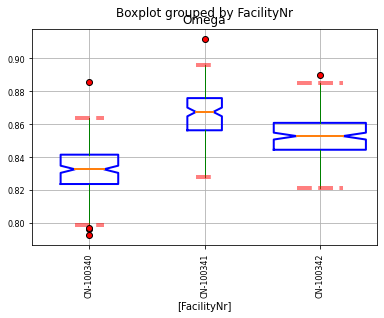

In [35]:
rt = dt_plt.boxplot(column=['Omega'],   #单列或多列, 
                   by=['FacilityNr'],
                   fontsize=8,          #x,y刻度字体大小;
                   rot=90,              #x轴刻度值旋转角度;
                   grid=True,           #网格线
                   # figsize=(14,8),      #fig 大小
                   # layout=(2,2),        #行列个数
                    return_type='dict',   #"axes","dict","both"

                    #matplotlib 参数
                    notch=True,        #显示V型凹槽
                    sym='o',           #异常值的形状
                    vert=True,         #bool, box是竖直还是横着
                    whis=1.5,     #胡须位置
                    bootstrap=None,
                    # usermedians=[0.85,0.5,0.5],     #是否指定中位数
                    positions=[1,2,3],       #指定箱体的位置,及顺序, 默认[1,2,3,...,N], N是要绘制的箱体的个数
                    widths=[0.5,0.3,0.8],              #float or array-like, 设置每个箱体的宽度
                    patch_artist=False,       #bool, 是否填充箱体的颜色
                    labels=["A","B","C"],    #为箱线图添加标签，类似于图例的作用
                    manage_ticks=True,       #刻度位置和标签将调整以匹配方框图位置
                    autorange=False,
                    meanline=True,          #是否用线的形式表示均值,  没看出来区别
                    zorder=None,
                    
                    # other parameters:
                    showcaps=True,          #bool, 是否显示帽子
                    showbox=True,           #bool, 是否显示中心框
                    showfliers=True,        #bool, 是否显示异常值
                    capprops={"color":"red","alpha":0.5,"linestyle":"--","linewidth":4},      #Line2D 相关属性
                    boxprops={"color":'blue',"linewidth":2},     #Line2D属性
                    whiskerprops={"color":"green"},
                    flierprops={"color":"red","mfc":"red"},       #Line2D 以及下面的marker属性
                    medianprops={"linewidth":2},          #Line2D属性
                    meanprops={"color":"green"},
         
          )

# for r in rt:    #rt 返回的是列表艺术家
#     print(r)
#     for x in r:
#         print(x.get_title())   #取值用get_xxx()
#         print(x.get_xlabel())
#         print("*"*30)
#     print("*"*50)

# for pls in rt:
#     for pl in pls:
#         try:
#             tlt = pl.get_title()
#             pl.axhline(dt_plt[tlt+'_UTL'].unique()[0],c='r')
#             pl.axhline(dt_plt[tlt+'_LTL'].unique()[0],c='r')
#         except:
#             pass
# for pl in rt:
#     pl.set_autoscaley_on(True)  #不起作用
# plt.tight_layout()
# plt.legend()

In [40]:
list(rt)

[{'whiskers': [<matplotlib.lines.Line2D at 0x1b77ec07940>,
  'caps': [<matplotlib.lines.Line2D at 0x1b77ec2e0a0>,
  'boxes': [<matplotlib.lines.Line2D at 0x1b77ec07550>,
  'medians': [<matplotlib.lines.Line2D at 0x1b77ec2e7c0>,
  'fliers': [<matplotlib.lines.Line2D at 0x1b77ec2eb50>,
  'means': []}]

CN-100340         AxesSubplot(0.1,0.559091;0.363636x0.340909)
CN-100341    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
CN-100342             AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

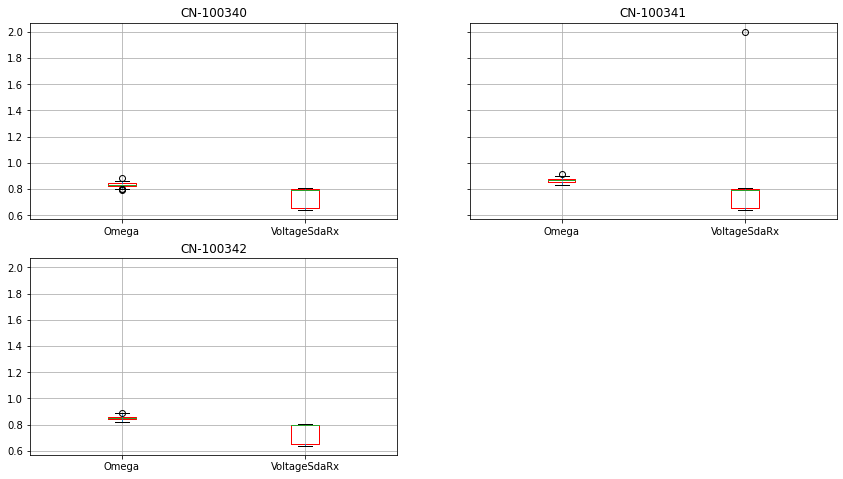

In [41]:
dt_plt.groupby("FacilityNr").boxplot(column=['Omega','VoltageSdaRx'],figsize=(14,8),boxprops={"color":"red"})

### clip:裁剪

In [42]:
dt.select_dtypes('float').clip(lower=0,upper=0.5,inplace=False).head()

,SubstrateSessionId,AtmHeatingDeviceCurrent,VoltageIn,VoltageSclTx,VoltageSdaRx,VoltageIfSelect,VoltageBoot,VoltageShieldTest,DutFirmwareMajorVersion,DutFirmwareMinorVersion,NumberOfDuts,DeviceIdInternal,ReadLmCalibBin,ReadPmCalibBin,AutoCleaningInterval_Reset,SetTargetFanSpeed,SetUpdateInterval,SetPeakThreshold,SetPeakClippingLimit,SetLaserSetPoint,SetNoiseSuppression,PhotoTicksLaserOff,PhotoTicksLaserOn,PhotoTicksDiff,ZeroInterceptPM2p5NumbConcRef_1,ZeroInterceptPM2p5MeanPartMassRef_1,ZeroInterceptPM10p0NumbConcRef_1,ZeroInterceptPM10p0MeanPartMassRef_1,Pm0p5NumbConcSPS1Ratio_1,Pm1p0NumbConcSPS1Ratio_1,Pm2p5NumbConcSPS1Ratio_1,Pm4p0NumbConcSPS1Ratio_1,Pm10p0NumbConcSPS1Ratio_1,Pm1p0MassConcSPS1Ratio_1,Pm2p5MassConcSPS1Ratio_1,Pm4p0MassConcSPS1Ratio_1,Pm10p0MassConcSPS1Ratio_1,Pm0p5NumbConcSPS2Ratio_1,Pm1p0NumbConcSPS2Ratio_1,Pm2p5NumbConcSPS2Ratio_1,Pm4p0NumbConcSPS2Ratio_1,Pm10p0NumbConcSPS2Ratio_1,Pm1p0MassConcSPS2Ratio_1,Pm2p5MassConcSPS2Ratio_1,Pm4p0MassConcSPS2Ratio_1,Pm10p0MassConcSPS2Ratio_1,T1RefMean_1,Rh1RefMean_1,T2RefMean_1,RH2RefMean_1,TAtmRefMean_1,RhAtmRefMean_1,TSagRefMean_1,RhSagRefMean_1,AmbientPressureRefMean_1,AirFlowRefMean_1,TTsiMean_1,DecayRatePM2p5NumbConcRef_1,NoisePM2p5NumbConcRef_1,PreCleaningTime_1,PostCleanPm10P0NumbConcMean_1,PostCleanPm10P0MassConcMean_1,FanSpeedMedian_1,FanVoltageMedian_1,FanSpeedStd_1,FanVoltageStd_1,PmNormRate_1,TotalCounts_1,ZeroInterceptPM2p5NumbConcRef_2,ZeroInterceptPM2p5MeanPartMassRef_2,ZeroInterceptPM10p0NumbConcRef_2,ZeroInterceptPM10p0MeanPartMassRef_2,Pm0p5NumbConcSPS1Ratio_2,Pm1p0NumbConcSPS1Ratio_2,Pm2p5NumbConcSPS1Ratio_2,Pm4p0NumbConcSPS1Ratio_2,Pm10p0NumbConcSPS1Ratio_2,Pm1p0MassConcSPS1Ratio_2,Pm2p5MassConcSPS1Ratio_2,Pm4p0MassConcSPS1Ratio_2,Pm10p0MassConcSPS1Ratio_2,Pm0p5NumbConcSPS2Ratio_2,Pm1p0NumbConcSPS2Ratio_2,Pm2p5NumbConcSPS2Ratio_2,Pm4p0NumbConcSPS2Ratio_2,Pm10p0NumbConcSPS2Ratio_2,Pm1p0MassConcSPS2Ratio_2,Pm2p5MassConcSPS2Ratio_2,Pm4p0MassConcSPS2Ratio_2,Pm10p0MassConcSPS2Ratio_2,T1RefMean_2,Rh1RefMean_2,T2RefMean_2,RH2RefMean_2,TAtmRefMean_2,RhAtmRefMean_2,TSagRefMean_2,RhSagRefMean_2,AmbientPressureRefMean_2,AirFlowRefMean_2,TTsiMean_2,DecayRatePM2p5NumbConcRef_2,NoisePM2p5NumbConcRef_2,PreCleaningTime_2,PostCleanPm10P0NumbConcMean_2,PostCleanPm10P0MassConcMean_2,FanSpeedMedian_2,FanVoltageMedian_2,FanSpeedStd_2,FanVoltageStd_2,PmNormRate_2,TotalCounts_2,WarningCode,ErrorCode,KclHyp_0,KclHyp_1,KclHyp_2,KclHyp_3,KclHyp_4,KclHyp_5,ArzHyp_0,ArzHyp_1,ArzHyp_2,ArzHyp_3,ArzHyp_4,ArzHyp_5,Omega,GainKclMc_0p5,GainKclMc_1p0,GainKclMc_2p5,GainKclMc_4p0,GainKclMc_10p0,GainKclNc_0p5,GainKclNc_1p0,GainKclNc_2p5,GainKclNc_4p0,GainKclNc_10p0,GainArzMc_0p5,GainArzMc_1p0,GainArzMc_2p5,GainArzMc_4p0,GainArzMc_10p0,GainArzNc_0p5,GainArzNc_1p0,GainArzNc_2p5,GainArzNc_4p0,GainArzNc_10p0,ZeroInterceptPM2p5NumbConcRef_Remeasurement,ZeroInterceptPM2p5MeanPartMassRef_Remeasurement,ZeroInterceptPM10p0NumbConcRef_Remeasurement,ZeroInterceptPM10p0MeanPartMassRef_Remeasurement,Pm0p5NumbConcSPS1Ratio_Remeasurement,Pm1p0NumbConcSPS1Ratio_Remeasurement,Pm2p5NumbConcSPS1Ratio_Remeasurement,Pm4p0NumbConcSPS1Ratio_Remeasurement,Pm10p0NumbConcSPS1Ratio_Remeasurement,Pm1p0MassConcSPS1Ratio_Remeasurement,Pm2p5MassConcSPS1Ratio_Remeasurement,Pm4p0MassConcSPS1Ratio_Remeasurement,Pm10p0MassConcSPS1Ratio_Remeasurement,Pm0p5NumbConcSPS2Ratio_Remeasurement,Pm1p0NumbConcSPS2Ratio_Remeasurement,Pm2p5NumbConcSPS2Ratio_Remeasurement,Pm4p0NumbConcSPS2Ratio_Remeasurement,Pm10p0NumbConcSPS2Ratio_Remeasurement,Pm1p0MassConcSPS2Ratio_Remeasurement,Pm2p5MassConcSPS2Ratio_Remeasurement,Pm4p0MassConcSPS2Ratio_Remeasurement,Pm10p0MassConcSPS2Ratio_Remeasurement,T1RefMean_Remeasurement,Rh1RefMean_Remeasurement,T2RefMean_Remeasurement,RH2RefMean_Remeasurement,TAtmRefMean_Remeasurement,RhAtmRefMean_Remeasurement,TSagRefMean_Remeasurement,RhSagRefMean_Remeasurement,AmbientPressureRefMean_Remeasurement,AirFlowRefMean_Remeasurement,TTsiMean_Remeasurement,DecayRatePM2p5NumbConcRef_Remeasurement,NoisePM2p5NumbC

### combine:按照公式合并,对内容识别和判断后进行合并
    func:接收两个参数 df1,df2的列,是一列一列传入的 

In [43]:
df1 = pd.DataFrame({'A': [5, 0], 'B': [4, 1]})
df2 = pd.DataFrame({'A': [1, 1], 'B': [3, 3]})
df1
df2

,A,B
0,5,4
1,0,1


,A,B
0,1,3
1,1,3


In [44]:
take_smaller = (lambda s1, s2: s1 if s1.sum() < s2.sum() else s2)
df1.combine(df2,take_smaller)   #使用自定义函数

,A,B
0,1,4
1,1,1


In [45]:
df1.combine(df2,np.minimum)   #使用现成的函数

,A,B
0,1,3
1,0,1


### combine_first:
    用other里对应的索引中的值去填充df中的对应索引中的 null elements

In [ ]:
df1 = pd.DataFrame({'A': [None, 6], 'B': [None, 1]})
df2 = pd.DataFrame({'A': [5, 2], 'B': [3, 3]})
df1
df2

In [ ]:
df1.combine_first(df2)

### compare: 对比两个df,显示不同

In [54]:
df1 = pd.DataFrame({
"col1": ["a", "a", "b", "b", "a"],
"col2": [1.0, 2.0, 3.0, np.nan, 5.0],
"col3": [1.0, 2.0, 3.0, 4.0, 5.0]},
columns=["col1", "col2", "col3"])
df1

,col1,col2,col3
0,a,1.0,1.0
1,a,2.0,2.0
2,b,3.0,3.0
3,b,NaN,4.0
4,a,5.0,5.0


In [60]:
df2 = df1.copy()
df2.loc[0, 'col1'] = 'c'
df2.loc[2, 'col3'] = 4.0
# df2 = df2.sort_values("col1",ascending=False).reset_index(drop=True)
df2

,col1,col2,col3
0,c,1.0,1.0
1,a,2.0,2.0
2,b,3.0,4.0
3,b,NaN,4.0
4,a,5.0,5.0


In [61]:
df1.compare(df2,align_axis=1)   #是对齐index的

col1       col3      
  self other self other
0    a     c  NaN   NaN
2  NaN   NaN  3.0   4.0

### convert_dtypes: 自动推断数据类型

In [ ]:
dt.dtypes

In [ ]:
dt = dt.astype({'ProductionOrder':'object'})

In [ ]:
dt = dt.convert_dtypes(infer_objects=True)

In [ ]:
dt = dt.infer_objects()

### copy():

### corr: 相关性,不包括空值

In [ ]:
dt[['Omega','ArzHyp_0','PhotoTicksDiff']].corr()

### corrwith: 计算两个df之间的相关性

In [ ]:
df = dt[['Omega','ArzHyp_0','PhotoTicksDiff']].dropna(how='any').iloc[:100,:]
other = dt[['Omega','ArzHyp_0','PhotoTicksDiff']].dropna(how='any').iloc[50:150,:]

In [ ]:
df.corrwith(other,axis=0)

### count: 每一列非空值的个数

In [ ]:
dt.count()

### cov: 各列的协方差

In [ ]:
dt[['Omega','ArzHyp_0','PhotoTicksDiff']].cov()

### cummax:累计最大值

In [ ]:
dt[['Omega','ArzHyp_0','PhotoTicksDiff']].head(10).cummax()

### cummin:累计最小值

In [ ]:
dt[['Omega','ArzHyp_0','PhotoTicksDiff']].head(10).cummin()

### cumprod: 连乘

In [ ]:
dt[['Omega','ArzHyp_0','PhotoTicksDiff']].head(10).cumprod()

### cumsum: 连加

In [ ]:
dt[['Omega','ArzHyp_0','PhotoTicksDiff']].head(10).cumsum()

### describe: 描述性统计

In [ ]:
dt.describe(exclude=[object])

### diff:差值

In [6]:
dt[['Omega','ArzHyp_0','PhotoTicksDiff']].head(10)

,Omega,ArzHyp_0,PhotoTicksDiff
13,0.805299,0.544355,31.0
105,0.843441,0.599950,33.0
116,0.808971,0.566400,32.0
144,0.805097,0.550785,31.0
176,0.809706,0.553532,32.0
244,0.812718,0.558702,32.0
256,0.816307,0.564096,31.0
359,0.816703,0.572543,38.0
383,0.800661,0.546946,34.0
473,0.813984,0.564513,37.0


In [5]:
dt[['Omega','ArzHyp_0','PhotoTicksDiff']].head(10).diff()

,Omega,ArzHyp_0,PhotoTicksDiff
13,NaN,NaN,NaN
105,0.038143,0.055595,2.0
116,-0.034470,-0.033550,-1.0
144,-0.003874,-0.015615,-1.0
176,0.004609,0.002747,1.0
244,0.003011,0.005169,0.0
256,0.003589,0.005394,-1.0
359,0.000396,0.008447,7.0
383,-0.016042,-0.025597,-4.0
473,0.013323,0.017567,3.0


### div:浮点除法

In [ ]:
df = pd.DataFrame({'angles': [0, 3, 4],
                'degrees': [360, 180, 360]},
                index=['circle', 'triangle', 'rectangle'])
df

In [ ]:
df.div(10)

In [ ]:
df.rdiv(10)

### divide: 同div

### dot:矩阵乘法

In [ ]:
df = pd.DataFrame([[0, 1, -2, -1], [1, 1, 1, 1]])
df

In [ ]:
s = pd.Series([1, 1, 2, 1])
s

In [ ]:
df.dot(s)  #df 与 series 相乘: 即

### drop: 删除指定的行/列

In [ ]:
dt[['ProductionOrder','Omega','DeleteSuccessful']].drop(columns=["DeleteSuccessful"]).head(2)

### drop_duplicates: 去除重复值

In [ ]:
dt.drop_duplicates(subset=["BinCode"],keep='last')   #subset是列表,subset默认所有列

### droplevel:删除索引

In [62]:
dtlvl = dt.loc["2021-11-10 02:44:13":"2021-11-10 02:59:09",['BinCode','Omega','DeviceId']]
dtlvl.set_index(['DeviceId',"BinCode"],drop=True,append=True,inplace=True)
dtlvl

,,,Omega
StartDateTime,DeviceId,BinCode,
2021-11-10 02:44:13,F5B41B9D3BCFBBC9,75,NaN
2021-11-10 02:53:04,7174103819E3DDA0,01,0.845320
2021-11-10 02:57:20,7594297DD6CB4B31,01,0.820592
2021-11-10 02:59:09,71BDF29E9DBC6C78,F2,NaN


In [ ]:
dtlvl.droplevel('BinCode')

In [ ]:
dtlvl.reset_index(level='DeviceId',drop=True)

### dropna:删除空值

In [65]:
dtlvl.reset_index(inplace=True)
dtlvl

,index,StartDateTime,DeviceId,BinCode,Omega
0,0,2021-11-10 02:44:13,F5B41B9D3BCFBBC9,75,NaN
1,1,2021-11-10 02:53:04,7174103819E3DDA0,01,0.845320
2,2,2021-11-10 02:57:20,7594297DD6CB4B31,01,0.820592
3,3,2021-11-10 02:59:09,71BDF29E9DBC6C78,F2,NaN


In [66]:
dtlvl.dropna(subset="Omega")

,index,StartDateTime,DeviceId,BinCode,Omega
1,1,2021-11-10 02:53:04,7174103819E3DDA0,01,0.845320
2,2,2021-11-10 02:57:20,7594297DD6CB4B31,01,0.820592


### duplicated:重复的行

In [9]:
dt[dt.duplicated(subset=['DeviceId'],keep=False) & dt["DeviceId"].notna()][["DeviceId","BinCode"]]   #bool

,DeviceId,BinCode
StartDateTime,,
2021-11-12 23:03:44,331F4DCD8CABE9C5,75
2021-11-12 23:30:53,331F4DCD8CABE9C5,75


### eval:实现高性能运算

In [ ]:
# 算术运算:
df1,df2,df3,df4,df5 = (pd.DataFrame(np.random.randint(0,1000,(100,3))) for i in range(5))
result = pd.eval('-df1 * df2 / (df3 + df4) -df5')

In [ ]:
# 比较运算:
result = pd.eval('df1 < df2 <= df3 != df4')

In [ ]:
# 位运算:
result = pd.eval('(df1<0.5) & (df2<0.5) | (df3<df4)')

In [11]:
# 列之间的运算:
# result = pd.eval("(dt.Omega + dt.DecayRatePM2p5NumbConcRef_1) / (dt.VoltageSdaRx -1)")
dt.eval("tst=Omega+DecayRatePM2p5NumbConcRef_1/(VoltageSdaRx-1)").head(2)

,PmSetupId,ProductionOrder,BinCode,SubstrateSessionId,PmTrayId,PmRefId,PmRefCalibDate,PmPlaus1Id,PmPlaus2Id,RhTRef1Id,RhTRef2Id,RhTAtmId,RhTSagId,AtmHeatingDeviceCurrent,VoltageIn,VoltageSclTx,VoltageSdaRx,VoltageIfSelect,VoltageBoot,VoltageShieldTest,DutFirmwareMajorVersion,DutFirmwareMinorVersion,DeleteSuccessful,DeleteCalibrationSuccessful,ProductionDate,ProductionDateIsPass,ProductionDateIsWritten,NumberOfDuts,DeviceId,DeviceIdInternal,MicrocontrollerId,ReadLmCalibBin,ReadPmCalibBin,ReadAllBinsGoodQualityIndicator,AutoCleaningInterval_Reset,SetTargetFanSpeed,SetUpdateInterval,SetPeakThreshold,SetPeakClippingLimit,SetLaserSetPoint,SetNoiseSuppression,PhotoTicksLaserOff,PhotoTicksLaserOn,PhotoTicksDiff,ZeroInterceptPM2p5NumbConcRef_1,ZeroInterceptPM2p5MeanPartMassRef_1,ZeroInterceptPM10p0NumbConcRef_1,ZeroInterceptPM10p0MeanPartMassRef_1,Pm0p5NumbConcSPS1Ratio_1,Pm1p0NumbConcSPS1Ratio_1,Pm2p5NumbConcSPS1Ratio_1,Pm4p0NumbConcSPS1Ratio_1,Pm10p0NumbConcSPS1Ratio_1,Pm1p0MassConcSPS1Ratio_1,Pm2p5MassConcSPS1Ratio_1,Pm4p0MassConcSPS1Ratio_1,Pm10p0MassConcSPS1Ratio_1,Pm0p5NumbConcSPS2Ratio_1,Pm1p0NumbConcSPS2Ratio_1,Pm2p5NumbConcSPS2Ratio_1,Pm4p0NumbConcSPS2Ratio_1,Pm10p0NumbConcSPS2Ratio_1,Pm1p0MassConcSPS2Ratio_1,Pm2p5MassConcSPS2Ratio_1,Pm4p0MassConcSPS2Ratio_1,Pm10p0MassConcSPS2Ratio_1,T1RefMean_1,Rh1RefMean_1,T2RefMean_1,RH2RefMean_1,TAtmRefMean_1,RhAtmRefMean_1,TSagRefMean_1,RhSagRefMean_1,AmbientPressureRefMean_1,AirFlowRefMean_1,TTsiMean_1,DecayRatePM2p5NumbConcRef_1,NoisePM2p5NumbConcRef_1,PreCleaningTime_1,PostCleanPm10P0NumbConcMean_1,PostCleanPm10P0MassConcMean_1,FanSpeedMedian_1,FanVoltageMedian_1,FanSpeedStd_1,FanVoltageStd_1,PmNormRate_1,TotalCounts_1,ZeroInterceptPM2p5NumbConcRef_2,ZeroInterceptPM2p5MeanPartMassRef_2,ZeroInterceptPM10p0NumbConcRef_2,ZeroInterceptPM10p0MeanPartMassRef_2,Pm0p5NumbConcSPS1Ratio_2,Pm1p0NumbConcSPS1Ratio_2,Pm2p5NumbConcSPS1Ratio_2,Pm4p0NumbConcSPS1Ratio_2,Pm10p0NumbConcSPS1Ratio_2,Pm1p0MassConcSPS1Ratio_2,Pm2p5MassConcSPS1Ratio_2,Pm4p0MassConcSPS1Ratio_2,Pm10p0MassConcSPS1Ratio_2,Pm0p5NumbConcSPS2Ratio_2,Pm1p0NumbConcSPS2Ratio_2,Pm2p5NumbConcSPS2Ratio_2,Pm4p0NumbConcSPS2Ratio_2,Pm10p0NumbConcSPS2Ratio_2,Pm1p0MassConcSPS2Ratio_2,Pm2p5MassConcSPS2Ratio_2,Pm4p0MassConcSPS2Ratio_2,Pm10p0MassConcSPS2Ratio_2,T1RefMean_2,Rh1RefMean_2,T2RefMean_2,RH2RefMean_2,TAtmRefMean_2,RhAtmRefMean_2,TSagRefMean_2,RhSagRefMean_2,AmbientPressureRefMean_2,AirFlowRefMean_2,TTsiMean_2,DecayRatePM2p5NumbConcRef_2,NoisePM2p5NumbConcRef_2,PreCleaningTime_2,PostCleanPm10P0NumbConcMean_2,PostCleanPm10P0MassConcMean_2,FanSpeedMedian_2,FanVoltageMedian_2,FanSpeedStd_2,FanVoltageStd_2,PmNormRate_2,TotalCounts_2,CalculationSuccessful,WarningCode,ErrorCode,KclHyp_0,KclHyp_1,KclHyp_2,KclHyp_3,KclHyp_4,KclHyp_5,ArzHyp_0,ArzHyp_1,ArzHyp_2,ArzHyp_3,ArzHyp_4,ArzHyp_5,Omega,GainKclMc_0p5,GainKclMc_1p0,GainKclMc_2p5,GainKclMc_4p0,GainKclMc_10p0,GainKclNc_0p5,GainKclNc_1p0,GainKclNc_2p5,GainKclNc_4p0,GainKclNc_10p0,GainArzMc_0p5,GainArzMc_1p0,GainArzMc_2p5,GainArzMc_4p0,GainArzMc_10p0,GainArzNc_0p5,GainArzNc_1p0,GainArzNc_2p5,GainArzNc_4p0,GainArzNc_10p0,WriteCalibrationSuccessful,ZeroInterceptPM2p5NumbConcRef_Remeasurement,ZeroInterceptPM2p5MeanPartMassRef_Remeasurement,ZeroInterceptPM10p0NumbConcRef_Remeasurement,ZeroInterceptPM10p0MeanPartMassRef_Remeasurement,Pm0p5NumbConcSPS1Ratio_Remeasurement,Pm1p0NumbConcSPS1Ratio_Remeasurement,Pm2p5NumbConcSPS1Ratio_Remeasurement,Pm4p0NumbConcSPS1Ratio_Remeasurement,Pm10p0NumbConcSPS1Ratio_Remeasurement,Pm1p0MassConcSPS1Ratio_Remeasurement,Pm2p5MassConcSPS1Ratio_Remeasurement,Pm4p0MassConcSPS1Ratio_Remeasurement,Pm10p0MassConcSPS1Ratio_Remeasurement,Pm0p5NumbConcSPS2Ratio_Remeasurement,Pm1p0NumbConcSPS2Ratio_Remeasurement,Pm2p5NumbConcSPS2Ratio_Remeasurement,Pm4p0NumbConcSPS2Ratio_Remeasurement,Pm10p0NumbConcSPS2Ratio_Remeasurement,Pm1p0MassConcSPS2Ratio_Remeasurement,Pm2p5MassConcSPS2Ratio_Remeasurement,Pm4p0MassConcSPS2Ratio_Remeasurement,Pm10p0MassConcSPS2Ratio_Remeasurement,T1RefMean

In [ ]:
# 用DataFrame.eval()新增列:
dt.eval("tst=Omega-VoltageSdaRx",inplace=True)
dt[['Omega','VoltageSdaRx','tst']].head(1)

In [ ]:
# 使用局部变量:
mn = 1
dt.eval('Omega+@mn').head(2)

In [12]:
# dt.head(2)

In [8]:
dt.eval("tst=DutFirmwareMajorVersion+1",inplace=True)

### ewm:加权移动平均

### expanding:滚动计算

### explode: 行转列, 元素是列标...,将其展开

In [40]:
df = pd.DataFrame({'A': [[0, 1, 2], 'foo', [], [3, 4]],
                   'B': 1,
                   'C': [['a', 'b', 'c'], np.nan, [], ['d', 'e']]})
df

,A,B,C
0,"[0, 1, 2]",1,"[a, b, c]"
1,foo,1,NaN
2,[],1,[]
3,"[3, 4]",1,"[d, e]"


In [41]:
df = df.explode('A')
df

,A,B,C
0,0,1,"[a, b, c]"
0,1,1,"[a, b, c]"
0,2,1,"[a, b, c]"
1,foo,1,NaN
2,NaN,1,[]
3,3,1,"[d, e]"
3,4,1,"[d, e]"


In [42]:
df

,A,B,C
0,0,1,"[a, b, c]"
0,1,1,"[a, b, c]"
0,2,1,"[a, b, c]"
1,foo,1,NaN
2,NaN,1,[]
3,3,1,"[d, e]"
3,4,1,"[d, e]"


### explode 的逆操作:

In [43]:
df = df.astype(str)

In [32]:
df.dtypes

A    object
B    object
C    object
dtype: object

In [47]:
df.groupby(["B","C"]).agg({'A':lambda x:x.tolist()}).reset_index().sort_index(axis=1)

,A,B,C
0,"[0, 1, 2]",1,"['a', 'b', 'c']"
1,"[3, 4]",1,"['d', 'e']"
2,[nan],1,[]
3,[foo],1,nan


### ffill: 填充,同 fillna,method='ffill'

### fillna: 填充空值

In [ ]:
dtlvl.fillna(1)

### filter:模糊筛选行/列

In [ ]:
dt.filter(like='Ome').head(2)

In [51]:
dt.filter(items=['Omega','BinCode']).head(2)

,Omega,BinCode
StartDateTime,,
2021-11-10 00:09:48,0.849134,01
2021-11-10 00:11:15,0.820711,01


In [ ]:
dt.filter(regex='O\w*',axis='columns').head(2)

In [ ]:
dt.filter(regex="N").head(2)

In [13]:
# 同时查找多个关键字, 中间用 "|"连接:
dt.filter(regex="2p5.+Mass").head(2)

,ZeroInterceptPM2p5MeanPartMassRef_1,ZeroInterceptPM2p5MeanPartMassRef_2,ZeroInterceptPM2p5MeanPartMassRef_Remeasurement
StartDateTime,,,
2021-11-10 00:09:48,0.354474,0.040148,0.037144
2021-11-10 00:11:15,0.342890,0.048970,0.046011


### first: 返回前 offset 行, 行索引必须是datetime

In [ ]:
dt.index = pd.to_datetime(dt.index)

In [ ]:
dt.first('10D')

### first_valid_index:返回第一个非空值的索引

In [7]:
dtlvl

,,,Omega
StartDateTime,DeviceId,BinCode,
2021-11-10 02:44:13,F5B41B9D3BCFBBC9,75,NaN
2021-11-10 02:53:04,7174103819E3DDA0,01,0.845320
2021-11-10 02:57:20,7594297DD6CB4B31,01,0.820592
2021-11-10 02:59:09,71BDF29E9DBC6C78,F2,NaN


In [6]:
dtlvl.first_valid_index()

('2021-11-10 02:53:04', '7174103819E3DDA0', '01')

### floordiv:获取dataframe和其他元素的整数除法,同df//other

### from_dict:字典转换成DataFrame
    to_dict:

In [14]:
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
# pd.DataFrame.from_dict(data)

In [15]:
pd.DataFrame(data)

,col_1,col_2
0,3,a
1,2,b
2,1,c
3,0,d


### from_records: 将Numpy数组转换成df
    to_records:

In [ ]:
data = [(3, 'a'), (2, 'b'), (1, 'c'), (0, 'd')]
pd.DataFrame.from_records(data, columns=['col_1', 'col_2'])

### ge:大于或等于dataframe和其他元素

### get:获取值

In [23]:
dget = dt[["DeviceId","Omega","BinCode"]].head()
dget

,DeviceId,Omega,BinCode
StartDateTime,,,
2021-11-10 00:09:48,2AB80839D91D9C90,0.849134,01
2021-11-10 00:11:15,0C307C48E6014CDB,0.820711,01
2021-11-10 00:23:24,96A5E82A1B697833,0.875859,01
2021-11-10 00:24:39,3B6118F5C03F79CB,NaN,F2
2021-11-10 00:28:03,0A280C32D5A87373,0.815063,01


In [27]:
tt = dget.get(['DeviceId','Omega','Voltage'],default='None')   #If the key isn't found, the default value will be used.
type(tt)
tt

str

'None'

pandas.core.series.Series

### groupby: 分组; 见DataFrameGroupBy_instance

### hist:    distribution data

array([<AxesSubplot:title={'center':'CN-100340'}>,
       <AxesSubplot:title={'center':'CN-100341'}>,
       <AxesSubplot:title={'center':'CN-100342'}>], dtype=object)

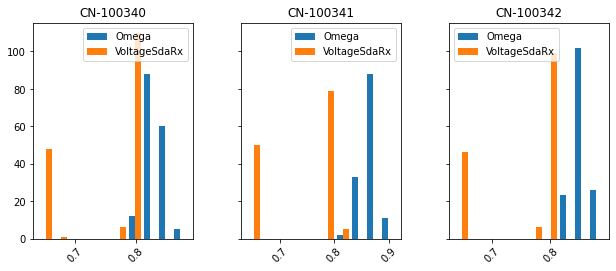

In [4]:
dt.hist(column=['Omega','VoltageSdaRx'],
       by='FacilityNr',
        layout=(1,3),
       figsize=(10,4),
       sharey=True,
       legend=True,
       xrot=45,
       )

FacilityNr
CN-100340    AxesSubplot(0.125,0.125;0.775x0.755)
CN-100341    AxesSubplot(0.125,0.125;0.775x0.755)
CN-100342    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Omega, dtype: object

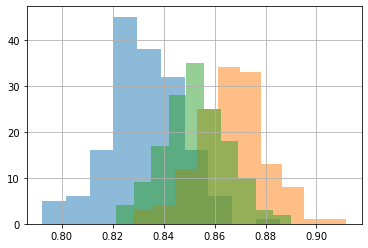

In [33]:
dt.groupby('FacilityNr')['Omega'].hist(alpha=0.5,)  #分组后,取各组'Omega' 合并在一起

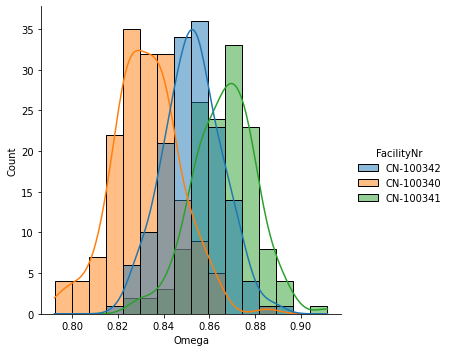

In [32]:
sns.displot(data=dt,
           x='Omega',
           hue='FacilityNr',
            kde=True,
           )

### idxmax:最大值索引

In [36]:
d = dt[['Omega','VoltageSdaRx']].head(10)
d

,Omega,VoltageSdaRx
StartDateTime,,
2021-11-10 00:09:48,0.849134,0.792436
2021-11-10 00:11:15,0.820711,0.792300
2021-11-10 00:23:24,0.875859,0.795779
2021-11-10 00:24:39,NaN,0.806241
2021-11-10 00:28:03,0.815063,0.641637
2021-11-10 00:42:34,NaN,0.790557
2021-11-10 00:44:18,0.869077,0.644885
2021-11-10 00:46:41,0.817069,0.791861
2021-11-10 00:57:17,0.856623,0.643351


In [37]:
d.idxmax()

Omega          2021-11-10 00:23:24
VoltageSdaRx   2021-11-10 00:24:39
dtype: datetime64[ns]

### idxmin:最小值索引

### infer_objects:  Attempt to infer better dtypes for object columns
    convert_dtypes:
    astype:

In [5]:
df = pd.DataFrame({"A":["a", 1, 2, 3]})
df = df.iloc[1:]
df

,A
1,1
2,2
3,3


In [6]:
df.dtypes

A    object
dtype: object

In [7]:
df.infer_objects().dtypes

A    int64
dtype: object

In [8]:
df.convert_dtypes().dtypes

A    Int64
dtype: object

### info:Print a concise summary of a DataFrame

In [9]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 511 entries, 2021-11-10 00:09:48 to 2021-11-12 23:57:44
Columns: 222 entries, PmSetupId to month
dtypes: float64(194), int64(8), object(20)
memory usage: 890.3+ KB


### insert:指定位置插入列

In [13]:
df = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4]})
df

,col1,col2
0,1,3
1,2,4


In [14]:
df.insert(loc=1,column='newcol2',value=df["col2"],allow_duplicates=True)  #loc: 新列所要在的位置
df

,col1,newcol2,col2
0,1,3,3
1,2,4,4


### interpolate: 向DataFrame中插入值
    Fill NaN values using an interpolation method.

In [28]:
dtst = dt[dt["DeviceId"].isin(["605BA1A42B2879B2","83C2D230C9AF3992","96A5E82A1B697833","8655C051BA4835B9","2AB80839D91D9C90"])][["GainKclNc_2p5","DeviceId"]]
dtst

,GainKclNc_2p5,DeviceId
StartDateTime,,
2021-11-10 00:09:48,5.519464,2AB80839D91D9C90
2021-11-10 00:23:24,5.185360,96A5E82A1B697833
2021-11-10 00:42:34,NaN,605BA1A42B2879B2
2021-11-10 00:44:18,6.622653,8655C051BA4835B9
2021-11-10 01:46:16,NaN,83C2D230C9AF3992


In [29]:
dtst.interpolate()

,GainKclNc_2p5,DeviceId
StartDateTime,,
2021-11-10 00:09:48,5.519464,2AB80839D91D9C90
2021-11-10 00:23:24,5.185360,96A5E82A1B697833
2021-11-10 00:42:34,5.904006,605BA1A42B2879B2
2021-11-10 00:44:18,6.622653,8655C051BA4835B9
2021-11-10 01:46:16,6.622653,83C2D230C9AF3992


### isin(values):是否DataFrame中的元素都在 values里

In [30]:
df = pd.DataFrame({'num_legs': [2, 4], 'num_wings': [2, 0]},index=['falcon', 'dog'])
df

,num_legs,num_wings
falcon,2,2
dog,4,0


In [31]:
df.isin([0,2])

,num_legs,num_wings
falcon,True,True
dog,False,True


In [38]:
df.isin({'num_legs': [2,4,6]})
# num_wings

,num_legs,num_wings
falcon,True,False
dog,True,False


In [34]:
# 整行进行判断:
other = pd.DataFrame({'num_legs': [8, 2], 'num_wings': [0, 2]},index=['spider', 'falcon'])
other
df.isin(other)

,num_legs,num_wings
spider,8,0
falcon,2,2


,num_legs,num_wings
falcon,True,True
dog,False,False


### isna:探测缺失值

In [39]:
df = pd.DataFrame(dict(age=[5, 6, np.NaN],
                    born=[pd.NaT, pd.Timestamp('1939-05-27'),
                    pd.Timestamp('1940-04-25')],
                    name=['Alfred', 'Batman', ''],
                    toy=[None, 'Batmobile', 'Joker']))
df

,age,born,name,toy
0,5.0,NaT,Alfred,None
1,6.0,1939-05-27,Batman,Batmobile
2,NaN,1940-04-25,,Joker


In [40]:
df.isna()

,age,born,name,toy
0,False,True,False,True
1,False,False,False,False
2,True,False,False,False


In [41]:
df[df["born"].isna()]

,age,born,name,toy
0,5.0,NaT,Alfred,None


### isnull: 同isna

In [ ]:
df.isnull()

### items: 迭代列

In [42]:
d = dt[['Omega','VoltageSdaRx']].head(10)
d

,Omega,VoltageSdaRx
StartDateTime,,
2021-11-10 00:09:48,0.849134,0.792436
2021-11-10 00:11:15,0.820711,0.792300
2021-11-10 00:23:24,0.875859,0.795779
2021-11-10 00:24:39,NaN,0.806241
2021-11-10 00:28:03,0.815063,0.641637
2021-11-10 00:42:34,NaN,0.790557
2021-11-10 00:44:18,0.869077,0.644885
2021-11-10 00:46:41,0.817069,0.791861
2021-11-10 00:57:17,0.856623,0.643351


In [45]:
for label,content in d.items():   #迭代列
    print(f'label:{label}')
    print("*"*50)
    print(f'content:{content}',sep='\n')
    print(type(content))

label:Omega
**************************************************
content:StartDateTime
2021-11-10 00:09:48    0.849134
2021-11-10 00:11:15    0.820711
2021-11-10 00:23:24    0.875859
2021-11-10 00:24:39         NaN
2021-11-10 00:28:03    0.815063
2021-11-10 00:42:34         NaN
2021-11-10 00:44:18    0.869077
2021-11-10 00:46:41    0.817069
2021-11-10 00:57:17    0.856623
2021-11-10 00:57:32    0.848443
Name: Omega, dtype: float64
<class 'pandas.core.series.Series'>
label:VoltageSdaRx
**************************************************
content:StartDateTime
2021-11-10 00:09:48    0.792436
2021-11-10 00:11:15    0.792300
2021-11-10 00:23:24    0.795779
2021-11-10 00:24:39    0.806241
2021-11-10 00:28:03    0.641637
2021-11-10 00:42:34    0.790557
2021-11-10 00:44:18    0.644885
2021-11-10 00:46:41    0.791861
2021-11-10 00:57:17    0.643351
2021-11-10 00:57:32    0.786269
Name: VoltageSdaRx, dtype: float64
<class 'pandas.core.series.Series'>


### iteritems: 返回的是迭代器

### iterrows:迭代行

In [46]:
df = pd.DataFrame({'num_legs': [4, 2], 'num_wings': [0, 2]},index=['dog', 'hawk'])
df

,num_legs,num_wings
dog,4,0
hawk,2,2


In [48]:
for c,content in df.iterrows():
    print(f'label:{c}')
    print(f'content:{content}')
    print(type(content))

label:dog
content:num_legs     4
num_wings    0
Name: dog, dtype: int64
<class 'pandas.core.series.Series'>
label:hawk
content:num_legs     2
num_wings    2
Name: hawk, dtype: int64
<class 'pandas.core.series.Series'>


### itertuples: 迭代行

In [49]:
df = pd.DataFrame({'num_legs': [4, 2], 'num_wings': [0, 2]},index=['dog', 'hawk'])
df

,num_legs,num_wings
dog,4,0
hawk,2,2


In [50]:
for row in df.itertuples():
    print(row)

Pandas(Index='dog', num_legs=4, num_wings=0)
Pandas(Index='hawk', num_legs=2, num_wings=2)


### join:Join columns of another DataFrame
    将另一个df在列方向上进行合并

In [4]:
df = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'],
                    'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']})
df

,key,A
0,K0,A0
1,K1,A1
2,K2,A2
3,K3,A3
4,K4,A4
5,K5,A5


In [5]:
other = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
                     'B': ['B0', 'B1', 'B2']})
other

,key,B
0,K0,B0
1,K1,B1
2,K2,B2


In [6]:
df.join(other, lsuffix='_caller', rsuffix='_other')

,key_caller,A,key_other,B
0,K0,A0,K0,B0
1,K1,A1,K1,B1
2,K2,A2,K2,B2
3,K3,A3,NaN,NaN
4,K4,A4,NaN,NaN
5,K5,A5,NaN,NaN


### keys:This is index for Series, columns for DataFrame

In [9]:
dd = dt[["Omega","DeviceId"]].head()

In [16]:
dd.keys()    #返回列名
print("*"*50)
dd.keys      #返回的是方法

Index(['Omega', 'DeviceId'], dtype='object')

**************************************************


<bound method NDFrame.keys of                         Omega          DeviceId
StartDateTime                                  
2021-11-10 00:09:48  0.849134  2AB80839D91D9C90
2021-11-10 00:11:15  0.820711  0C307C48E6014CDB
2021-11-10 00:23:24  0.875859  96A5E82A1B697833
2021-11-10 00:24:39       NaN  3B6118F5C03F79CB
2021-11-10 00:28:03  0.815063  0A280C32D5A87373>

In [12]:
type(dd.keys)

method

### kurt:在请求的轴上返回无偏峰度

### kurtosis:峰度

### last:Select final periods of time series data based on a date offset
    同first

In [ ]:
dt.last('0.5H')

### last_valid_index:返回最后一个非空值的索引
    同first_valid_index

### mask:替换满足条件的值

In [17]:
d = dt[['Omega','VoltageIn']].head(10)
d

,Omega,VoltageIn
StartDateTime,,
2021-11-10 00:09:48,0.849134,0.521151
2021-11-10 00:11:15,0.820711,0.524995
2021-11-10 00:23:24,0.875859,0.526363
2021-11-10 00:24:39,NaN,0.524518
2021-11-10 00:28:03,0.815063,0.521947
2021-11-10 00:42:34,NaN,0.521852
2021-11-10 00:44:18,0.869077,0.524688
2021-11-10 00:46:41,0.817069,0.523000
2021-11-10 00:57:17,0.856623,0.522252


In [20]:
d.mask(d>0.85,other=10)  #不满足条件的用other替换

,Omega,VoltageIn
StartDateTime,,
2021-11-10 00:09:48,0.849134,0.521151
2021-11-10 00:11:15,0.820711,0.524995
2021-11-10 00:23:24,10.000000,0.526363
2021-11-10 00:24:39,NaN,0.524518
2021-11-10 00:28:03,0.815063,0.521947
2021-11-10 00:42:34,NaN,0.521852
2021-11-10 00:44:18,10.000000,0.524688
2021-11-10 00:46:41,0.817069,0.523000
2021-11-10 00:57:17,10.000000,0.522252


In [23]:
d.where(d>0.524,10)  #刚好和mask相反

,Omega,VoltageIn
StartDateTime,,
2021-11-10 00:09:48,0.849134,10.000000
2021-11-10 00:11:15,0.820711,0.524995
2021-11-10 00:23:24,0.875859,0.526363
2021-11-10 00:24:39,10.000000,0.524518
2021-11-10 00:28:03,0.815063,10.000000
2021-11-10 00:42:34,10.000000,10.000000
2021-11-10 00:44:18,0.869077,0.524688
2021-11-10 00:46:41,0.817069,10.000000
2021-11-10 00:57:17,0.856623,10.000000


### max:

In [ ]:
d.max()

### mean:

In [ ]:
d.mean()

### median:

In [ ]:
d.median()

### melt:将宽数据转换成长数据, 见TableManipulation

In [26]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                    'B': {0: 1, 1: 3, 2: 5},
                    'C': {0: 2, 1: 4, 2: 6}})
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [27]:
pd.melt(df,id_vars='A',value_vars='C')


,A,variable,value
0,a,C,2
1,b,C,4
2,c,C,6


In [28]:
pd.melt(df,id_vars='A')   #

,A,variable,value
0,a,B,1
1,b,B,3
2,c,B,5
3,a,C,2
4,b,C,4
5,c,C,6


### memory_usage:每列使用的内存情况

In [30]:
# dt.memory_usage()

### merge:合并  见TableManipulations

### min:

### mode:众数

In [ ]:
d = dt[['BinCode','VoltageIn']].head(200)
d.head(1)

In [ ]:
d.mode()

### nlargest:前n各最大的值/行

In [33]:
dt.nlargest(columns=['Omega'],n=10,keep='last')[['Omega','DeviceId']]   #

,Omega,DeviceId
StartDateTime,,
2021-11-12 06:18:58,0.911739,78981EC263A47F54
2021-11-12 08:38:04,0.895980,972427E6A0626F3D
2021-11-12 04:19:52,0.893525,C1E6F0EBDD9D0399
2021-11-12 03:03:15,0.893242,20E578BE5BE1B5AF
2021-11-11 19:36:05,0.889922,92B97B7755E2D2C4
2021-11-12 09:55:29,0.889916,9AC3CDFDFFF388BC
2021-11-11 03:21:00,0.888720,5B91F612E2567255
2021-11-10 06:18:22,0.888581,3054D43FEB18E7EC
2021-11-11 19:20:23,0.887461,815E8495869BDF06


### notna:非空值

### notnull: 同notna

### nsmallest:前n个最小的值/行

In [34]:
dt.nsmallest(columns=['Omega'],n=3)[['Omega','DeviceId']]

,Omega,DeviceId
StartDateTime,,
2021-11-11 10:13:51,0.792304,DED47F538B2C3082
2021-11-10 01:15:45,0.795980,D804F5AFBFD49662
2021-11-12 12:36:37,0.796658,47D7D03C960F12BE


### nunique:唯一值的个数

In [38]:
# dt.nunique()

### pipe:Apply func

In [ ]:
d = dt[['Omega','VoltageSdaRx']].head(5)
d

In [ ]:
#所有元素加n
def add_n(df,n):
    df2=df.applymap(lambda x:x+n)
    return df2
#所有元素减n
def minus_n(df,n):
    df2=df.applymap(lambda x:x-n)
    return df2

In [ ]:
(d.pipe(add_n,20)
  .pipe(minus_n,10)
)

### pivot: reshape  见TableManipulations

### pivot_table:  见TableManipulations

### plot:  见 pandas_plot.ipynb

In [16]:
dt.filter(like='Omega').head(2)

,Omega
StartDateTime,
2021-11-10 00:09:48,0.849134
2021-11-10 00:11:15,0.820711


Omega              AxesSubplot(0.125,0.125;0.352273x0.755)
VoltageSdaRx    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

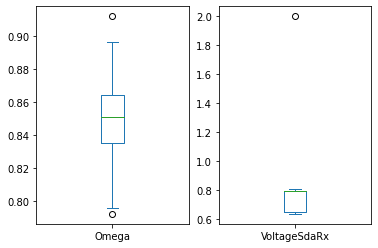

In [10]:
dt[['Omega','VoltageSdaRx']].plot(kind='box',subplots=True,)

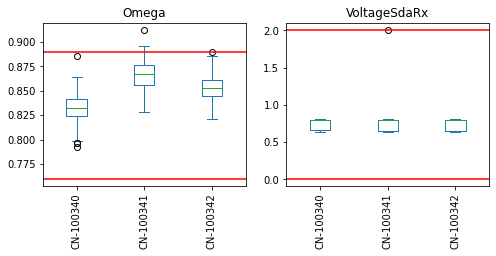

In [28]:
axes = dt_plt.plot.box(column=['Omega','VoltageSdaRx'],by='FacilityNr',figsize=(8,3),rot=90)
for ax in axes:
    ttl = ax.get_title()
    try:
        ax.axhline(dt_plt[ttl+"_UTL"].unique()[0],c='r');
        ax.axhline(dt_plt[ttl+"_LTL"].unique()[0],c='r');
    except:
        pass

### quantile:分位数

In [29]:
dt['Omega'].quantile(q=[0.25,0.5,0.75])

0.25    0.835276
0.50    0.850605
0.75    0.863887
Name: Omega, dtype: float64

### query:

### reindex:用自定义的索引替换df的索引

In [ ]:
index = ['Firefox', 'Chrome', 'Safari', 'IE10', 'Konqueror']
df = pd.DataFrame({'http_status': [200, 200, 404, 404, 301],
                    'response_time': [0.04, 0.02, 0.07, 0.08, 1.0]},
                    index=index)
df

In [ ]:
new_index = ['Safari', 'Iceweasel', 'Comodo Dragon', 'IE10','Chrome']
df.reindex(new_index)

### reindex_like: 借用df2的索引,给df1

In [ ]:
df1 = pd.DataFrame([[24.3, 75.7, 'high'],
                    [31, 87.8, 'high'],
                    [22, 71.6, 'medium'],
                    [35, 95, 'medium']],
                columns=['temp_celsius', 'temp_fahrenheit','windspeed'],
                index=pd.date_range(start='2014-02-12',end='2014-02-15', freq='D'))
df1

In [ ]:
df2 = pd.DataFrame([[28, 'low'],
                    [30, 'low'],
                    [35.1, 'medium']],
                    columns=['temp_celsius', 'windspeed'],
                    index=pd.DatetimeIndex(['2014-02-12', '2014-02-13','2014-02-15']))
df2

In [ ]:
df2.reindex_like(df1)

### rename:改名字

In [ ]:
d = dt[['NumberOfDuts','Omega','DeviceId']].rename(columns={'NumberOfDuts':'NBD'})
d.head(2)

In [ ]:
d.rename(columns=(str.upper)).head(2)

In [ ]:
d.rename(columns=((lambda x: print(x)))).head(2)  #列标签会作为变量传到 lambda中

### rename_axis:修改索引的名称

In [ ]:
d.rename_axis(mapper=('date'),axis='index').head(1)

In [ ]:
d.rename_axis(mapper=('pars'),axis='columns').head(1)

### reorder_level:Rearrange index levels

### replace:

### resample:重新抽样时间序列

### reset_index:  重置行索引

### round:小数点位数

In [ ]:
dt[['Omega','VoltageSclTx']].head(2)

In [ ]:
dt[['Omega','VoltageSclTx']].head(2).round(2)

### sample:随机抽样

In [ ]:
dt.sample(2)

### select_dtypes: 按照类型筛选列

In [4]:
dt.select_dtypes(include=object).head(2)

,PmSetupId,BinCode,PmRefCalibDate,PmPlaus1Id,PmPlaus2Id,DeleteSuccessful,DeleteCalibrationSuccessful,ProductionDate,ProductionDateIsPass,ProductionDateIsWritten,DeviceId,MicrocontrollerId,ReadAllBinsGoodQualityIndicator,CalculationSuccessful,WriteCalibrationSuccessful,FacilityNr,T15,TestThatBinned,day,month
StartDateTime,,,,,,,,,,,,,,,,,,,,
2021-11-10 00:09:48,CN-100342,01,2021-06-15 00:00:00.0000000,3863BD1B897A85D5,25597FB80B649433,True,True,11/10/2021 00:00:00,True,True,2AB80839D91D9C90,30-31-47-0A-32-38-34-33-19-00-4E-00,False,True,True,CN-100342,True,NaN,2021-11-10,2021-11
2021-11-10 00:11:15,CN-100340,01,2021-08-02 00:00:00.0000000,1083BC99C9E78E8C,8C98CDA9CD1933FF,True,True,11/10/2021 00:00:00,True,True,0C307C48E6014CDB,30-31-47-0D-32-38-34-33-41-00-30-00,False,True,True,CN-100340,True,NaN,2021-11-10,2021-11


### sem:返回所请求轴上的平均值的无偏标准误差

### set_axis:外部输入作为索引

In [5]:
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
df

,A,B
0,1,4
1,2,5
2,3,6


In [6]:
df.set_axis(['a', 'b', 'c'], axis='index')

,A,B
a,1,4
b,2,5
c,3,6


In [7]:
df.set_axis(['I', 'II'], axis='columns')

,I,II
0,1,4
1,2,5
2,3,6


### set_flags:返回带有更新标志的新对象

In [8]:
dt.flags.allows_duplicate_labels

True

In [ ]:
df = dt.set_flags(allows_duplicate_labels=False)
df.flags.allows_duplicate_labels

### set_index:现有列作为索引

In [ ]:
dt.set_index('DeviceId').head(2)

### shift:移动

### skew:偏度

### slice_shift:函数相当于在不复制数据的情况下进行移位。

### sort_index:对索引进行排序

In [13]:
(dt.sort_index(axis=0,       #可以对行, 也可以对列进行排序
               level=0,
               ascending=True,
               inplace=False,
               kind='quicksort',
               na_position='last',
               sort_remaining=True,   #针对多级索引
               ignore_index=True,   #是否要忽视原索引
               # key = 'function',  #对索引值进行函数应用
              )
 .head(2))

,PmSetupId,ProductionOrder,BinCode,SubstrateSessionId,PmTrayId,PmRefId,PmRefCalibDate,PmPlaus1Id,PmPlaus2Id,RhTRef1Id,RhTRef2Id,RhTAtmId,RhTSagId,AtmHeatingDeviceCurrent,VoltageIn,VoltageSclTx,VoltageSdaRx,VoltageIfSelect,VoltageBoot,VoltageShieldTest,DutFirmwareMajorVersion,DutFirmwareMinorVersion,DeleteSuccessful,DeleteCalibrationSuccessful,ProductionDate,ProductionDateIsPass,ProductionDateIsWritten,NumberOfDuts,DeviceId,DeviceIdInternal,MicrocontrollerId,ReadLmCalibBin,ReadPmCalibBin,ReadAllBinsGoodQualityIndicator,AutoCleaningInterval_Reset,SetTargetFanSpeed,SetUpdateInterval,SetPeakThreshold,SetPeakClippingLimit,SetLaserSetPoint,SetNoiseSuppression,PhotoTicksLaserOff,PhotoTicksLaserOn,PhotoTicksDiff,ZeroInterceptPM2p5NumbConcRef_1,ZeroInterceptPM2p5MeanPartMassRef_1,ZeroInterceptPM10p0NumbConcRef_1,ZeroInterceptPM10p0MeanPartMassRef_1,Pm0p5NumbConcSPS1Ratio_1,Pm1p0NumbConcSPS1Ratio_1,Pm2p5NumbConcSPS1Ratio_1,Pm4p0NumbConcSPS1Ratio_1,Pm10p0NumbConcSPS1Ratio_1,Pm1p0MassConcSPS1Ratio_1,Pm2p5MassConcSPS1Ratio_1,Pm4p0MassConcSPS1Ratio_1,Pm10p0MassConcSPS1Ratio_1,Pm0p5NumbConcSPS2Ratio_1,Pm1p0NumbConcSPS2Ratio_1,Pm2p5NumbConcSPS2Ratio_1,Pm4p0NumbConcSPS2Ratio_1,Pm10p0NumbConcSPS2Ratio_1,Pm1p0MassConcSPS2Ratio_1,Pm2p5MassConcSPS2Ratio_1,Pm4p0MassConcSPS2Ratio_1,Pm10p0MassConcSPS2Ratio_1,T1RefMean_1,Rh1RefMean_1,T2RefMean_1,RH2RefMean_1,TAtmRefMean_1,RhAtmRefMean_1,TSagRefMean_1,RhSagRefMean_1,AmbientPressureRefMean_1,AirFlowRefMean_1,TTsiMean_1,DecayRatePM2p5NumbConcRef_1,NoisePM2p5NumbConcRef_1,PreCleaningTime_1,PostCleanPm10P0NumbConcMean_1,PostCleanPm10P0MassConcMean_1,FanSpeedMedian_1,FanVoltageMedian_1,FanSpeedStd_1,FanVoltageStd_1,PmNormRate_1,TotalCounts_1,ZeroInterceptPM2p5NumbConcRef_2,ZeroInterceptPM2p5MeanPartMassRef_2,ZeroInterceptPM10p0NumbConcRef_2,ZeroInterceptPM10p0MeanPartMassRef_2,Pm0p5NumbConcSPS1Ratio_2,Pm1p0NumbConcSPS1Ratio_2,Pm2p5NumbConcSPS1Ratio_2,Pm4p0NumbConcSPS1Ratio_2,Pm10p0NumbConcSPS1Ratio_2,Pm1p0MassConcSPS1Ratio_2,Pm2p5MassConcSPS1Ratio_2,Pm4p0MassConcSPS1Ratio_2,Pm10p0MassConcSPS1Ratio_2,Pm0p5NumbConcSPS2Ratio_2,Pm1p0NumbConcSPS2Ratio_2,Pm2p5NumbConcSPS2Ratio_2,Pm4p0NumbConcSPS2Ratio_2,Pm10p0NumbConcSPS2Ratio_2,Pm1p0MassConcSPS2Ratio_2,Pm2p5MassConcSPS2Ratio_2,Pm4p0MassConcSPS2Ratio_2,Pm10p0MassConcSPS2Ratio_2,T1RefMean_2,Rh1RefMean_2,T2RefMean_2,RH2RefMean_2,TAtmRefMean_2,RhAtmRefMean_2,TSagRefMean_2,RhSagRefMean_2,AmbientPressureRefMean_2,AirFlowRefMean_2,TTsiMean_2,DecayRatePM2p5NumbConcRef_2,NoisePM2p5NumbConcRef_2,PreCleaningTime_2,PostCleanPm10P0NumbConcMean_2,PostCleanPm10P0MassConcMean_2,FanSpeedMedian_2,FanVoltageMedian_2,FanSpeedStd_2,FanVoltageStd_2,PmNormRate_2,TotalCounts_2,CalculationSuccessful,WarningCode,ErrorCode,KclHyp_0,KclHyp_1,KclHyp_2,KclHyp_3,KclHyp_4,KclHyp_5,ArzHyp_0,ArzHyp_1,ArzHyp_2,ArzHyp_3,ArzHyp_4,ArzHyp_5,Omega,GainKclMc_0p5,GainKclMc_1p0,GainKclMc_2p5,GainKclMc_4p0,GainKclMc_10p0,GainKclNc_0p5,GainKclNc_1p0,GainKclNc_2p5,GainKclNc_4p0,GainKclNc_10p0,GainArzMc_0p5,GainArzMc_1p0,GainArzMc_2p5,GainArzMc_4p0,GainArzMc_10p0,GainArzNc_0p5,GainArzNc_1p0,GainArzNc_2p5,GainArzNc_4p0,GainArzNc_10p0,WriteCalibrationSuccessful,ZeroInterceptPM2p5NumbConcRef_Remeasurement,ZeroInterceptPM2p5MeanPartMassRef_Remeasurement,ZeroInterceptPM10p0NumbConcRef_Remeasurement,ZeroInterceptPM10p0MeanPartMassRef_Remeasurement,Pm0p5NumbConcSPS1Ratio_Remeasurement,Pm1p0NumbConcSPS1Ratio_Remeasurement,Pm2p5NumbConcSPS1Ratio_Remeasurement,Pm4p0NumbConcSPS1Ratio_Remeasurement,Pm10p0NumbConcSPS1Ratio_Remeasurement,Pm1p0MassConcSPS1Ratio_Remeasurement,Pm2p5MassConcSPS1Ratio_Remeasurement,Pm4p0MassConcSPS1Ratio_Remeasurement,Pm10p0MassConcSPS1Ratio_Remeasurement,Pm0p5NumbConcSPS2Ratio_Remeasurement,Pm1p0NumbConcSPS2Ratio_Remeasurement,Pm2p5NumbConcSPS2Ratio_Remeasurement,Pm4p0NumbConcSPS2Ratio_Remeasurement,Pm10p0NumbConcSPS2Ratio_Remeasurement,Pm1p0MassConcSPS2Ratio_Remeasurement,Pm2p5MassConcSPS2Ratio_Remeasurement,Pm4p0MassConcSPS2Ratio_Remeasurement,Pm10p0MassConcSPS2Ratio_Remeasurement,T1RefMean

### sort_values:对列进行排序

### squeeze:1维数据压缩成标量

In [27]:
d = dt.iloc[:5,:15]['PmTrayId'].head(1)
d

StartDateTime
2021-11-10 00:09:48    67
Name: PmTrayId, dtype: int64

In [28]:
d.squeeze()

67

### stack:将column转换成index

In [29]:
d = d = dt.iloc[:5,:5]
d

,PmSetupId,ProductionOrder,BinCode,SubstrateSessionId,PmTrayId
StartDateTime,,,,,
2021-11-10 00:09:48,CN-100342,1992660,01,37368.0,67
2021-11-10 00:11:15,CN-100340,1992659,01,37369.0,70
2021-11-10 00:23:24,CN-100341,1992659,01,37371.0,72
2021-11-10 00:24:39,CN-100342,1992660,F2,37370.0,68
2021-11-10 00:28:03,CN-100340,1992659,01,37372.0,71


In [30]:
d.stack()

StartDateTime                          
2021-11-10 00:09:48  PmSetupId             CN-100342
                     ProductionOrder         1992660
                     BinCode                      01
                     SubstrateSessionId      37368.0
                     PmTrayId                     67
2021-11-10 00:11:15  PmSetupId             CN-100340
                     ProductionOrder         1992659
                     BinCode                      01
                     SubstrateSessionId      37369.0
                     PmTrayId                     70
2021-11-10 00:23:24  PmSetupId             CN-100341
                     ProductionOrder         1992659
                     BinCode                      01
                     SubstrateSessionId      37371.0
                     PmTrayId                     72
2021-11-10 00:24:39  PmSetupId             CN-100342
                     ProductionOrder         1992660
                     BinCode                      F2
      

In [31]:
d.stack().unstack(level=0)

StartDateTime,2021-11-10 00:09:48,2021-11-10 00:11:15,2021-11-10 00:23:24,2021-11-10 00:24:39,2021-11-10 00:28:03
PmSetupId,CN-100342,CN-100340,CN-100341,CN-100342,CN-100340
ProductionOrder,1992660,1992659,1992659,1992660,1992659
BinCode,01,01,01,F2,01
SubstrateSessionId,37368.0,37369.0,37371.0,37370.0,37372.0
PmTrayId,67,70,72,68,71


### std:标准差

In [32]:
d = dt.loc['2021-11-10 00:09:48':'2021-11-10 00:28:03',['Omega','KclHyp_0']]
d

,Omega,KclHyp_0
StartDateTime,,
2021-11-10 00:09:48,0.849134,0.864157
2021-11-10 00:11:15,0.820711,0.837868
2021-11-10 00:23:24,0.875859,0.845295
2021-11-10 00:24:39,NaN,NaN
2021-11-10 00:28:03,0.815063,0.868583


In [33]:
d.std()

Omega       0.028066
KclHyp_0    0.014740
dtype: float64

### sum:求和

In [7]:
d['sum'] = d.sum(axis=1)
d

,Omega,KclHyp_0,sum
StartDateTime,,,
2021-11-10 00:09:48,0.849134,0.864157,1.713291
2021-11-10 00:11:15,0.820711,0.837868,1.658579
2021-11-10 00:23:24,0.875859,0.845295,1.721154
2021-11-10 00:24:39,NaN,NaN,0.000000
2021-11-10 00:28:03,0.815063,0.868583,1.683646


### swapaxes:交换轴

In [34]:
d.swapaxes(axis1=1,axis2=0)

StartDateTime,2021-11-10 00:09:48,2021-11-10 00:11:15,2021-11-10 00:23:24,2021-11-10 00:24:39,2021-11-10 00:28:03
Omega,0.849134,0.820711,0.875859,NaN,0.815063
KclHyp_0,0.864157,0.837868,0.845295,NaN,0.868583


### swaplevel:对于多重索引,交换位置

In [5]:
d = dt.loc['2021-11-10 00:09:48':'2021-11-10 00:28:03',['Omega','KclHyp_0','DeviceId']].set_index('DeviceId',append=True)
d

,,Omega,KclHyp_0
StartDateTime,DeviceId,,
2021-11-10 00:09:48,2AB80839D91D9C90,0.849134,0.864157
2021-11-10 00:11:15,0C307C48E6014CDB,0.820711,0.837868
2021-11-10 00:23:24,96A5E82A1B697833,0.875859,0.845295
2021-11-10 00:24:39,3B6118F5C03F79CB,NaN,NaN
2021-11-10 00:28:03,0A280C32D5A87373,0.815063,0.868583


In [36]:
d.swaplevel(0,1)

,,Omega,KclHyp_0
DeviceId,StartDateTime,,
2AB80839D91D9C90,2021-11-10 00:09:48,0.849134,0.864157
0C307C48E6014CDB,2021-11-10 00:11:15,0.820711,0.837868
96A5E82A1B697833,2021-11-10 00:23:24,0.875859,0.845295
3B6118F5C03F79CB,2021-11-10 00:24:39,NaN,NaN
0A280C32D5A87373,2021-11-10 00:28:03,0.815063,0.868583


### tail:尾

In [ ]:
dt.tail(2)

### take:

In [37]:
d = dt.loc["2021-11-10 00:09:48":"2021-11-10 00:28:03",["Omega","BinCode","VoltageIn","VoltageShieldTest"]]
d

,Omega,BinCode,VoltageIn,VoltageShieldTest
StartDateTime,,,,
2021-11-10 00:09:48,0.849134,01,0.521151,0.013378
2021-11-10 00:11:15,0.820711,01,0.524995,0.021055
2021-11-10 00:23:24,0.875859,01,0.526363,0.026291
2021-11-10 00:24:39,NaN,F2,0.524518,0.012108
2021-11-10 00:28:03,0.815063,01,0.521947,0.015715


In [38]:
d.take([0,2,4])   #取0,2,4三行

,Omega,BinCode,VoltageIn,VoltageShieldTest
StartDateTime,,,,
2021-11-10 00:09:48,0.849134,01,0.521151,0.013378
2021-11-10 00:23:24,0.875859,01,0.526363,0.026291
2021-11-10 00:28:03,0.815063,01,0.521947,0.015715


In [39]:
d.take([0,2],axis=1)

,Omega,VoltageIn
StartDateTime,,
2021-11-10 00:09:48,0.849134,0.521151
2021-11-10 00:11:15,0.820711,0.524995
2021-11-10 00:23:24,0.875859,0.526363
2021-11-10 00:24:39,NaN,0.524518
2021-11-10 00:28:03,0.815063,0.521947


In [40]:
d.take([-1,-3])

,Omega,BinCode,VoltageIn,VoltageShieldTest
StartDateTime,,,,
2021-11-10 00:28:03,0.815063,01,0.521947,0.015715
2021-11-10 00:23:24,0.875859,01,0.526363,0.026291


### to_csv

### to_dict: 将DataFrame转换成dict

In [ ]:
d.take([1,2]).to_dict()

In [ ]:
d.take([1,2]).to_dict(orient='list')

In [ ]:
from collections import OrderedDict, defaultdict

In [ ]:
d.take([1,2]).to_dict(orient='list',into=OrderedDict)

In [ ]:
d.take([1,2]).to_dict(orient='list',into=defaultdict(list))

### to_excel

### to_feather

### to_gbq

### to_hdf

### to_html

In [ ]:
d.to_html(r'.\testfile\htmlTest.html',justify='center')

### to_jason

### to_latex

In [ ]:
d.to_latex()

In [ ]:
d.style.to_latex()

### to_markdown

In [6]:
import tabulate

In [8]:
d.to_markdown("markdown.md")

### to_numpy

### to_parquet

### to_period

### to_pickle

### to_records
    Convert DataFrame to a NumPy record array

### to_sql

### to_stata

In [ ]:
d.to_stata(r".\testfile\stataTest.dta")

In [ ]:
st = pd.read_stata(r".\testfile\stataTest.dta")
st

### to_string
    Render a DataFrame to a console-friendly tabular output.

In [ ]:
sg = d.to_string()
sg.split("\n")

### to_timestamp

### to_xarray

### to_xml

In [11]:
dxml.to_xml(r".\testfile\xmlTest.xml")

### read_xml

In [9]:
dxml = pd.read_xml(r"C:\SVN\SEN4X_Calibration_ini\3.000.228-002\MC03_CN-100340_3.000.228-002.binningcfg.xml",
                   # xpath=r"./TestGroupSequenceList/MC03/*"
                  )

In [10]:
dxml.head(2)

,MC03,DefaultPassBin,SystemErrorBin,IncompleteBin,NoTestBin,ErrorBin,NotBinnedBin,InvalidResultBin,SkippedBin,NoDeviceBin,Bin,HardBin
0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0x01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### transform

In [ ]:
tf = dt['Omega']

In [ ]:
tf.transform(func=lambda x: x*2)   #单个变换函数, 将每一个值传入lambda

In [ ]:
tf.transform(func=[lambda x: x*2,np.log,np.sqrt])  #将每一个值传入lambda

In [ ]:
tf.transform(func=[(lambda s: (s - s.mean()) / s.std()),lambda x: x*2]).head()   #将每一个值传入lambda

In [ ]:
dt[['Omega','VoltageIn','VoltageSclTx']].transform(func=[lambda s: s+1,np.log]).head()  #将每一列传入lambda

In [ ]:
# 对各列使用不同的函数:
dt[['Omega','VoltageIn','VoltageSclTx']].transform(func={'Omega':np.log,
                                                        'VoltageIn':lambda s: s+1,
                                                        }).head(2)

In [ ]:
# 分组,对缺失值进行填充:
dt[['FacilityNr','Omega','VoltageIn','VoltageSclTx']].groupby('FacilityNr')[['Omega','VoltageIn']].transform(func=(lambda x: x.fillna(x.mean().round(2)))).head(2)

### transpose

In [ ]:
d = dt.loc["2021-11-10 00:09:48":"2021-11-10 00:28:03",["Omega","BinCode","VoltageIn","VoltageShieldTest"]]
d

In [ ]:
d.transpose()

### truediv

### truncate

In [48]:
# 从行中截取:
dt.truncate(before='2021-11-10 00:23:24',after='2021-11-10 00:44:18')[['VoltageBoot','VoltageIn']].head(2)

,VoltageBoot,VoltageIn
StartDateTime,,
2021-11-10 00:23:24,0.793489,0.526363
2021-11-10 00:24:39,0.793273,0.524518


In [44]:
dt.sort_index(axis=1,inplace=True)

In [46]:
# 从列中截取:
dt.truncate(before='VoltageBoot',after='VoltageIn',axis=1).head(2)

,VoltageBoot,VoltageIfSelect,VoltageIn
StartDateTime,,,
2021-11-10 00:09:48,0.789385,0.800062,0.521151
2021-11-10 00:11:15,0.822433,0.820907,0.524995


### tshift: 将用shift代替,  可以把数据移动指定的位数
    Shift the time index, using the index’s frequency if available.

In [ ]:
dt.index = pd.to_datetime(dt.index)
dt.head(2)
dt.shift(periods=1,freq='1D').head(2)

### tz_convert

In [ ]:
import pytz

In [ ]:
pytz.country_timezones('SE')

In [ ]:
tlt = ['2021-11-10 00:09:48', '2021-11-10 00:11:15','2021-11-10 00:23:24', '2021-11-10 00:24:39',]
tm = pd.to_datetime(tlt)
tm

In [ ]:
tmtz = tm.tz_localize('Asia/Shanghai')

In [ ]:
tmtz.tz_convert(tz='Europe/Stockholm')

### tz_localize

In [ ]:
dt.index.tz_localize('Asia/Shanghai')

### unstack

In [ ]:
d = dt.loc["2021-11-10 00:09:48":"2021-11-10 00:28:03",["DeviceId","Omega","BinCode","VoltageIn","VoltageShieldTest"]].set_index('DeviceId',append=True)
d

In [ ]:
d.unstack(level=1,fill_value='')

### update
    使用来自另一个DataFrame的非NA值进行适当的修改

In [ ]:
df = pd.DataFrame({'A': [1, 2, 3,4],
                    'B': [400, 500, 600,700]})
new_df = pd.DataFrame({'B': [4, 5, 6],
                        'C': [7, 8, 9]})

df
new_df

In [ ]:
df.update(new_df)   #索引对齐,将 new_df中的值替换掉df中的值
df

### value_counts:
    Return a Series containing counts of unique rows in the DataFrame

In [9]:
df = pd.DataFrame({'num_legs': [2, 4, 4, 6],
                    'num_wings': [2, 0, 0, 0]},
                    index=['falcon', 'dog', 'cat', 'ant'])
df

,num_legs,num_wings
falcon,2,2
dog,4,0
cat,4,0
ant,6,0


In [11]:
df['num_legs'].value_counts()   #每个值重复的次数

4    2
2    1
6    1
Name: num_legs, dtype: int64

### var

In [ ]:
dt['Omega'].std()

In [ ]:
dt['Omega'].var()

### where
    Replace values where the condition is False.

In [ ]:
df = pd.DataFrame(np.arange(10).reshape(-1, 2), columns=['A', 'B'])
df

In [ ]:
m = df%3==0
df.where(m,-df)

### xs
    xs用于多重索引中

In [ ]:
np.arrays = [['one','one','one','two','two','two'],[1,2,3,1,2,3]]
df = pd.DataFrame(np.random.randn(6,2),index=pd.MultiIndex.from_tuples(list(zip(*np.arrays))),columns=['A','B'])
df